<a href="https://colab.research.google.com/github/Niu-933/Data/blob/main/nlpyang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**--------------------------------- Tokenization by StandfordCoreNLP -----------------------------------**


What we need looks like: https://github.com/nlpyang/BertSum/blob/master/json_data/cnndm_sample.train.0.json

*split into sentence then individual words

I tried two methods and had some problems:

In [2]:
import tensorflow as tf

In [3]:
# Get the GPU device name.
device_name = tf.test.gpu_device_name()

In [4]:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

In [6]:
cd /content/

/content


In [7]:
!git clone https://github.com/nlpyang/BertSum.git

Cloning into 'BertSum'...
remote: Enumerating objects: 301, done.
remote: Total 301 (delta 0), reused 0 (delta 0), pack-reused 301
Receiving objects: 100% (301/301), 15.03 MiB | 16.86 MiB/s, done.
Resolving deltas: 100% (174/174), done.


First method: I split whold document by sentences. It works, but I can't put them into a correct json file. 

In [ ]:
!pip install stanfordnlp

In [9]:
import stanfordnlp

In [10]:
stanfordnlp.download('en', force=True)

Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.

Download location: /root/stanfordnlp_resources/en_ewt_models.zip


100%|██████████| 235M/235M [00:40<00:00, 5.74MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.


In [ ]:
import json
with open('/content/BertSum/json_data/cnndm_sample.train.0.json', 'r') as f:
  data = json.loads(f.read())

In [ ]:
import json
with open('/content/test.json', 'r') as f:
  data = json.loads(f.read())

In [ ]:
nlp = stanfordnlp.Pipeline(processors='tokenize', lang='en')
data = str(data)
#.replace('\\n', " ")
doc = nlp(data)

In [ ]:
sent = str()
for i, sentence in enumerate(doc.sentences):
    sent0 = ' '.join(word.text for word in sentence.words)
    sent = sent+sent0

In [ ]:
ss = eval(sent)

In [ ]:
def split_list(sentence):
    # Split each sentence in the list, and append to result list
    return [item.split() for item in sentence]

In [ ]:
def json_data(data,key):
  for item in key:
    data[item] = data[item].split("\n")
    data[item] = split_list(data[item])
  return(data)

In [ ]:
for key in keey:
    ss.pop(key, None)

In [ ]:
keey = [' cik ', ' company ', ' filing_type ', ' filing _ date ', ' period_of_report ', ' sic', ' state_of_inc ', ' state_location ', ' fiscal_year_end ', ' filing_html_index ', ' htm_filing_link ', ' complete_text_filing_link ', ' filename ']

In [ ]:
keys = [' item_1 ', ' item_1A ', ' item _ 1 B ', ' item_ 2 ', ' item_ 3 ', ' item _ 4 ', ' item_5 ', ' item_6 ', ' item _ 7 ', ' item _7A ', ' item_ 8 ', ' item _ 9 ', ' item_9 A ', ' item_9 B ', ' item _10 ', ' item_11 ', ' item_12 ', ' item_13 ', ' item_14 ', ' item_15 ']
da = json_data(ss,keys)

In [ ]:
with open("/content/BertSum/json_data/cnndm_sample.train.1.json", "w") as fp:
    json.dump([da],fp,indent=4)

In [ ]:

da['src'] = da[' item_1 ']
del da[' item_1 ']
print("New dictionary-",da['src'])


In [ ]:
for d in data:
  d


In [ ]:
print(ss.keys())

dict_keys([' item_1 ', ' item_1A ', ' item _ 1 B ', ' item_ 2 ', ' item_ 3 ', ' item _ 4 ', ' item_5 ', ' item_6 ', ' item _ 7 ', ' item _7A ', ' item_ 8 ', ' item _ 9 ', ' item_9 A ', ' item_9 B ', ' item _10 ', ' item_11 ', ' item_12 ', ' item_13 ', ' item_14 ', ' item_15 '])


In [ ]:
!python preprocess.py -mode format_to_bert -raw_path ../json_data -save_path ../bert_data -oracle_mode combination -n_cpus 1 -log_file ../logs/preprocess.log

Sencond methods: Error: Could not find or load main class edu.stanford.nlp.pipeline.StanfordCoreNLP
Caused by: java.lang.ClassNotFoundException: edu.stanford.nlp.pipeline.StanfordCoreNLP

**Sentences Spliting then Format to Simpler Json Files
It's used by https://github.com/nlpyang/BertSum

We'v already download json file. Maybe the first methods is better? 
I want to use their code to traning the models: BertSum+{LSTM,classifier,Transformer} and BertSum+RNN

I tried their traning code, it works well. 

Besides, I'd like to built a simple BART model and T5 model. Just the simple one, not too complicate. https://github.com/pytorch/fairseq/tree/main/examples/bart

Next step: 
 tokenize all data
 traning models (I'm not sure if my own laptop can handle them, if not, I have to use campus's computer. Can I stay at classroom for a whole day?)
 And write data and model part 

In [ ]:
cd /content/BertSum/src/

/content/BertSum/src


In [ ]:
!pip install pytorch_pretrained_bert

In [8]:
!pip install torch==1.1.0 pytorch_transformers tensorboardX multiprocess pyrouge

     |████████████████████████████████| 676.9 MB 3.9 kB/s 
     |████████████████████████████████| 176 kB 47.9 MB/s 
     |████████████████████████████████| 125 kB 50.9 MB/s 
     |████████████████████████████████| 60 kB 6.9 MB/s 
     |████████████████████████████████| 1.2 MB 39.2 MB/s 
     |████████████████████████████████| 895 kB 40.4 MB/s 
  Created wheel for pyrouge: filename=pyrouge-0.1.3-py3-none-any.whl size=191621 sha256=84e28cf08099dad33ba7d8913b4471ff3561e6bb359f8082233742f5d40216db
  Stored in directory: /root/.cache/pip/wheels/68/35/6a/ffb9a1f51b2b00fee42e7f67f5a5d8e10c67d048cda09ccd57
Successfully built pyrouge
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu1

In [ ]:
cd /content/

/content


The following code is about the training model.

In [11]:
cd /content/BertSum/src/bert_data/

[Errno 2] No such file or directory: '/content/BertSum/src/bert_data/'
/content


In [10]:
!pip install googleDriveFileDownloader

In [ ]:
from googleDriveFileDownloader import googleDriveFileDownloader
gdrive = googleDriveFileDownloader()
gdrive.downloadFile("https://drive.google.com/uc?id=1x0d61LP9UAN389YN00z0Pv-7jQgirVg6&export=download")

In [ ]:
#!unzip /content/BertSum/bert_data/bertsum_data.zip

In [ ]:
#!pip install pytorch_pretrained_bert

In [ ]:
#!pip install torch==1.1.0 pytorch_transformers tensorboardX multiprocess pyrouge

In [ ]:
!python train.py -mode train -encoder classifier -dropout 0.1 -bert_data_path ../bert_data/cnndm -model_path ../models/bert_classifierr -lr 2e-3 -visible_gpus 0 -gpu_ranks 0 -world_size 1 -report_every 50 -save_checkpoint_steps 100 -batch_size 3000 -decay_method noam -train_steps 200 -accum_count 2 -log_file ../logs/bert_classifier -use_interval true -warmup_steps 100

In [20]:
!python train.py -mode validate -bert_data_path ../bert_data/cnndm -model_path  ../models/bert_transformer  -visible_gpus 0  -gpu_ranks 0 -batch_size 3000  -log_file ../logs/vsli  -result_path ../results/cnndm -test_all -block_trigram True

[2022-03-22 08:23:40,841 INFO] Loading checkpoint from ../models/bert_transformer/model_step_50.pt
Namespace(accum_count=1, batch_size=3000, bert_config_path='../bert_config_uncased_base.json', bert_data_path='../bert_data/cnndm', beta1=0.9, beta2=0.999, block_trigram=True, dataset='', decay_method='', dropout=0.1, encoder='transformer', ff_size=2048, gpu_ranks=[0], heads=8, hidden_size=128, inter_layers=2, log_file='../logs/vsli', lr=1, max_grad_norm=0, mode='validate', model_path='../models/bert_transformer', optim='adam', param_init=0, param_init_glorot=True, recall_eval=False, report_every=1, report_rouge=True, result_path='../results/cnndm', rnn_size=512, save_checkpoint_steps=5, seed=666, temp_dir='../temp', test_all=True, test_from='', train_from='', train_steps=1000, use_interval=True, visible_gpus='0', warmup_steps=8000, world_size=1)
[2022-03-22 08:23:46,240 INFO] Loading valid dataset from ../bert_data/cnndm.valid.0.bert.pt, number of examples: 2001
gpu_rank 0
[2022-03-22 08

In [ ]:
==2.60

In [ ]:
!pip install pyrouge --upgrade
!pip install https://github.com/bheinzerling/pyrouge/archive/master.zip
!pip install pyrouge
!pip show pyrouge
!git clone https://github.com/andersjo/pyrouge.git
from pyrouge import Rouge155
!pyrouge_set_rouge_path 'pyrouge/tools/ROUGE-1.5.5'

In [12]:
cd /content/BertSum/bert_data/

/content/BertSum/bert_data


In [13]:
!pip install googleDriveFileDownloader

In [14]:
from googleDriveFileDownloader import googleDriveFileDownloader
gdrive = googleDriveFileDownloader()
gdrive.downloadFile("https://drive.google.com/uc?id=1x0d61LP9UAN389YN00z0Pv-7jQgirVg6&export=download")

Download is starting
FILENAME ::: bertsum_data.zip


0

In [ ]:
!unzip /content/BertSum/bert_data/bertsum_data.zip

In [17]:
cd /content/BertSum/src/

/content/BertSum/src


In [ ]:
!python train.py -mode train -encoder transformer -dropout 0.1 -bert_data_path ../bert_data/cnndm -model_path ../models/bert_transformer -lr 2e-3 -visible_gpus 0  -gpu_ranks 0 -world_size 1 -report_every 50 -save_checkpoint_steps 50 -batch_size 3000 -decay_method noam -train_steps 50 -accum_count 2 -log_file ../logs/bert_transformer -use_interval true -warmup_steps 10 -ff_size 2048 -inter_layers 2 -heads 8

In [ ]:
#!python train.py -mode validate -bert_data_path ../bert_data/cnndm -model_path ../models/bert_transformer  -visible_gpus 0  -gpu_ranks 0 -batch_size 30000  -log_file ../logs/bert_transformer  -result_path ../results/conndm -test_all -block_trigram true

In [ ]:
#max_len = 0

# For every sentence...
#for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
#    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
#    max_len = max(max_len, len(input_ids))

#print('Max sentence length: ', max_len)

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

7,695 training samples
  856 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import BertTokenizerFast, EncoderDecoderModel
device = 'cuda' if torch.cuda.is_available() else 'cpu'
ckpt = 'mrm8488/bert2bert_shared-spanish-finetuned-summarization'
tokenizer = BertTokenizerFast.from_pretrained(ckpt)
model = EncoderDecoderModel.from_pretrained(ckpt).to(device)


In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 324 different named parameters.

==== Embedding Layer ====

encoder.embeddings.word_embeddings.weight               (31002, 768)
encoder.embeddings.position_embeddings.weight             (512, 768)
encoder.embeddings.token_type_embeddings.weight             (2, 768)
encoder.embeddings.LayerNorm.weight                           (768,)
encoder.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

encoder.encoder.layer.0.attention.self.query.weight       (768, 768)
encoder.encoder.layer.0.attention.self.query.bias             (768,)
encoder.encoder.layer.0.attention.self.key.weight         (768, 768)
encoder.encoder.layer.0.attention.self.key.bias               (768,)
encoder.encoder.layer.0.attention.self.value.weight       (768, 768)
encoder.encoder.layer.0.attention.self.value.bias             (768,)
encoder.encoder.layer.0.attention.output.dense.weight     (768, 768)
encoder.encoder.layer.0.attention.output.dense.bias           (

In [ ]:
python train.py -mode train -encoder classifier

SyntaxError: ignored

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
import random
import numpy as np

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []


total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        


        output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = output.loss
        logits = output.logits

        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():


            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
          output = model(b_input_ids, token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
        loss = output.loss
        logits = output.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Training...


IndexError: ignored

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.20,0.53,0.83,0:03:26,0:00:08
2,0.21,0.48,0.83,0:03:26,0:00:08
3,0.14,0.57,0.84,0:03:26,0:00:08
4,0.11,0.57,0.84,0:03:26,0:00:08


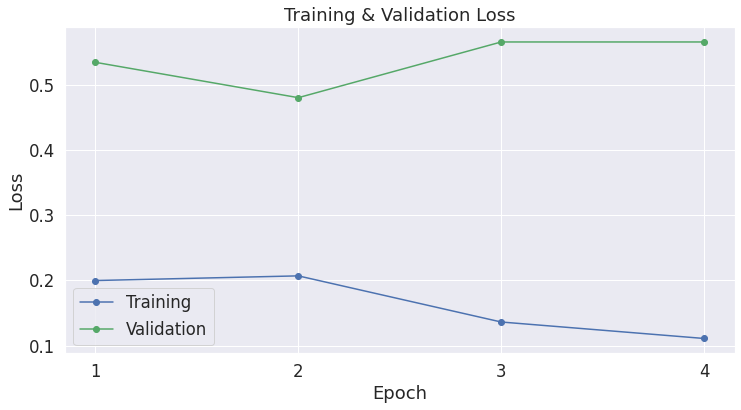

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 516



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2277: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 516 test sentences...
    DONE.


In [ ]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Positive samples: 354 of 516 (68.60%)


In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


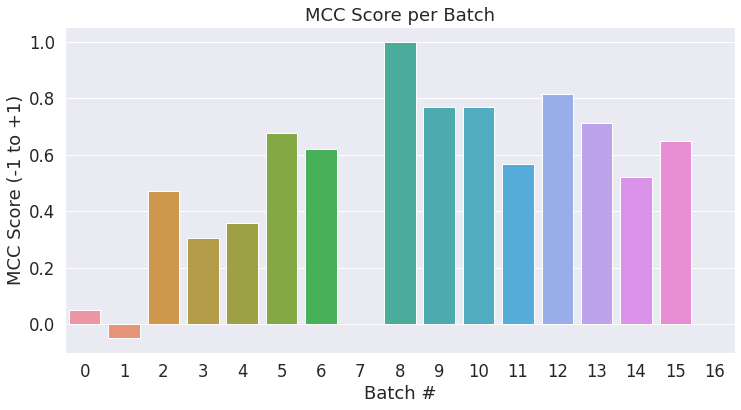

In [ ]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [ ]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.555


In [ ]:
cd /content/BertSum/src

/content/BertSum/src


In [ ]:
!python preprocess.py -mode tokenize -raw_path RAW_PATH -save_path TOKENIZED_PATH

Traceback (most recent call last):
  File "preprocess.py", line 62, in <module>
    init_logger(args.log_file)
  File "/content/BertSum/src/others/logging.py", line 19, in init_logger
    file_handler = logging.FileHandler(log_file)
  File "/usr/lib/python3.7/logging/__init__.py", line 1087, in __init__
    StreamHandler.__init__(self, self._open())
  File "/usr/lib/python3.7/logging/__init__.py", line 1116, in _open
    return open(self.baseFilename, self.mode, encoding=self.encoding)
FileNotFoundError: [Errno 2] No such file or directory: '/content/logs/cnndm.log'


In [ ]:
!pip install pytorch_pretrained_bert
!pip install torch==1.1.0 pytorch_transformers tensorboardX multiprocess pyrouge

     |████████████████████████████████| 123 kB 4.1 MB/s 
     |████████████████████████████████| 132 kB 26.0 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 8.6 MB 48.1 MB/s 
     |████████████████████████████████| 138 kB 48.1 MB/s 
     |████████████████████████████████| 127 kB 48.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 676.9 MB 4.0 kB/s 
     |████████████████████████████████| 176 kB 48.4 MB/s 
     |████████████████████████████████| 125 kB 46.5 MB/s 
     |████████████████████████████████| 60 kB 7.2 MB/s 
     |████████████████████████████████| 1.2 MB 40.2 MB/s 
     |████████████████████████████████| 895 kB 45.5 MB/s 
  Created wheel for pyrouge: filename=pyrouge-0.1.3-py3-none-any.whl size=191621 sha256=2caa0a7dfe66541d47fa0ae401f301878ddb4743649dfcfe805fb3982089e266
  Stored in directory: /root/.cache/pip/wheels/68/35/6a/ffb9a1f51b2b00fee42e7f67f5a5d8e10c67d048cda09ccd57
Successfully built pyrouge
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu1

In [ ]:
!python preprocess.py -mode tokenize -raw_path RAW_PATH -save_path TOKENIZED_PATH

python3: can't open file 'preprocess.py': [Errno 2] No such file or directory


In [ ]:
from transformers import BertTokenizerFast, EncoderDecoderModel
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizerFast.from_pretrained('mrm8488/bert-small2bert-small-finetuned-cnn_daily_mail-summarization')

Downloading:   0%|          | 0.00/324 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 3.8 MB/s 
     |████████████████████████████████| 596 kB 44.5 MB/s 
     |████████████████████████████████| 6.5 MB 45.2 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
inputs = tokenizer(["ITEM 8.FINANCIAL STATEMENTS AND SUPPLEMENTARY DATA\nReport of Independent Registered Public Accounting Firm\nTo the Stockholders and Board of Directors\nAAR CORP.:\nOpinion on the Consolidated Financial Statements\nWe have audited the accompanying consolidated balance sheets of AAR CORP. and subsidiaries (the Company) as of May 31, 2021 and 2020, the related consolidated statements of income, comprehensive income (loss), changes in equity, and cash flows for each of the years in the three year period ended May 31, 2021, and the related notes (collectively, the consolidated financial statements). In our opinion, the consolidated financial statements present fairly, in all material respects, the financial position of the Company as of May 31, 2021 and 2020, and the results of its operations and its cash flows for each of the years in the three year period ended May 31, 2021, in conformity with U.S. generally accepted accounting principles.\nWe also have audited, in accordance with the standards of the Public Company Accounting Oversight Board (United States) (PCAOB), the Company\u2019s internal control over financial reporting as of May 31, 2021, based on criteria established in Internal Control - Integrated Framework (2013) issued by the Committee of Sponsoring Organizations of the Treadway Commission, and our report dated July 20, 2021 expressed an unqualified opinion on the effectiveness of the Company\u2019s internal control over financial reporting.\nChange in Accounting Principle\nAs discussed in Note 1 to the consolidated financial statements, the Company has changed its method of accounting for leases as of June 1, 2019 due to the adoption of Accounting Standards Update No. 2016-02, Leases.\nBasis for Opinion\nThese consolidated financial statements are the responsibility of the Company\u2019s management. Our responsibility is to express an opinion on these consolidated financial statements based on our audits. We are a public accounting firm registered with the PCAOB and are required to be independent with respect to the Company in accordance with the U.S. federal securities laws and the applicable rules and regulations of the Securities and Exchange Commission and the PCAOB.\nWe conducted our audits in accordance with the standards of the PCAOB. Those standards require that we plan and perform the audit to obtain reasonable assurance about whether the consolidated financial statements are free of material misstatement, whether due to error or fraud. Our audits included performing procedures to assess the risks of material misstatement of the consolidated financial statements, whether due to error or fraud, and performing procedures that respond to those risks. Such procedures included examining, on a test basis, evidence regarding the amounts and disclosures in the consolidated financial statements. Our audits also included evaluating the accounting principles used and significant estimates made by management, as well as evaluating the overall presentation of the consolidated financial statements. We believe that our audits provide a reasonable basis for our opinion.\nCritical Audit Matters\nThe critical audit matters communicated below are matters arising from the current period audit of the consolidated financial statements that were communicated or required to be communicated to the audit committee and that: (1) relate to accounts or disclosures that are material to the consolidated financial statements and (2) involved our especially challenging, subjective, or complex judgments. The communication of critical audit matters does not alter in any way our opinion on the consolidated financial statements, taken as a whole, and we are not, by communicating the critical audit matters below, providing separate opinions on the critical audit matters or on the accounts or disclosures to which they relate.\nAssessment of the write-down of inventories\nAs discussed in Note 1 to the consolidated financial statements, the inventory balance as of May 31, 2021 was $540.6 million. The Company records inventory within the Aviation Services segment at the lower of cost or net realizable value. The write-\ndown of slow moving inventory is recorded for excess or obsolete inventory based on certain inputs and assumptions used to determine the net realizable value. These assumptions include the number of days transpiring from the date the inventory was originally received and the historical sales of inventory to determine recovery rates. Other inputs include current and expected future aviation usage trends, replacement values, expected future demand, and historical scrap recovery rates.\nWe identified the assessment of the write-down of inventories for a portion of the inventory within the Aviation Services segment as a critical audit matter. The primary inputs and assumptions used in determining the write-down of slow moving inventory include the historical recovery rates, which are based on the number of days transpiring from the date the inventory was originally received, the historical sales of inventory, and the identification of specific inventories associated with aircraft with declining usage trends. The assessment of these inputs required a higher degree of subjective auditor judgment in evaluating the future customer demand for slow moving inventory.\nThe following are the primary procedures we performed to address this critical audit matter. We evaluated the design and tested the operating effectiveness of certain internal controls over the Company\u2019s inventory process, including controls over the Company\u2019s evaluation of the impact on the estimate of net realizable value based on 1) the number of days transpiring from the date the inventory was originally received, 2) historical sales of inventory, and 3) specific inventories associated with aircraft with declining usage trends. We also tested relevant information technology application controls over the determination of the number of days transpiring from the date the inventory was originally received. We evaluated the write-down to determine that it was recorded using the Company\u2019s policy based on the number of days transpiring from the date the inventory was originally received and the recovery rates of existing inventory based on historical sales. We also assessed that the recovery rates applied to slow moving inventory were consistent with historical sales of these inventory items. We assessed the identification of specific inventory with declining usage trends by evaluating external industry information.\nEvaluation of the estimate of costs at completion of certain performance obligations\nAs discussed in Note 1 to the consolidated financial statements, for revenue in the Aviation Services segment with performance obligations that are satisfied over time, the Company recognizes revenue using the cost-to-cost input method, which depicts when control of the promised goods or services are transferred to the customer. Revenue is recognized based on the relationship of costs incurred to date to the estimated total costs at completion of the performance obligation. The net favorable cumulative catch-up adjustments recognized during fiscal year 2021 associated with Aviation Services revenue recognized over time totaled $12.0 million, which resulted from changes in the estimated billings and costs at completion of the performance obligations.\nWe identified the evaluation of the estimate of total costs at completion of the performance obligations for certain contracts within the Aviation Services segment as a critical audit matter. The key inputs and assumptions used in determining the revenue to be recognized include current and future costs to support the program, and future labor costs. The testing of the key inputs and assumptions required the application of subjective auditor judgment because of the estimation uncertainty associated with the inputs and assumptions.\nThe following are the primary procedures we performed to address this critical audit matter. We evaluated the design and tested the operating effectiveness of certain internal controls over the Company\u2019s revenue process, including controls over 1) the assessment of the estimated future costs, 2) actual costs incurred for each performance obligation that are used by the Company in their assessment of the measure of progress, and 3) the approval of costs recorded for each performance obligation to assess the allowability per the contract. We obtained the Company\u2019s forecast for the cost of a selection of Aviation Services revenue contracts and assessed that the measure of progress was determined using actual costs to date plus the estimated future costs to support the satisfaction of performance obligations. We selected a sample of contract costs where revenue is recognized over time to test actual fiscal year 2021 program costs by comparing them to underlying documentation. We evaluated the Company\u2019s historical estimates to assess their consistency with the Company\u2019s historical actual costs.\n/s/ KPMG LLP\nWe have served as the Company\u2019s auditor since 1985.\nChicago, Illinois\nJuly 20, 2021\nAAR CORP. AND SUBSIDIARIES\nCONSOLIDATED STATEMENTS OF INCOME\nThe accompanying notes to consolidated financial statements are an integral part of these statements.\nAAR CORP. AND SUBSIDIARIES\nCONSOLIDATED STATEMENTS OF COMPREHENSIVE INCOME (LOSS)\nThe accompanying notes to consolidated financial statements are an integral part of these statements.\nAAR CORP. AND SUBSIDIARIES\nCONSOLIDATED BALANCE SHEETS\nASSETS\nThe accompanying notes to consolidated financial statements are an integral part of these statements.\nAAR CORP. AND SUBSIDIARIES\nCONSOLIDATED BALANCE SHEETS\nLIABILITIES AND EQUITY\nThe accompanying notes to consolidated financial statements\nare an integral part of these statements.\nAAR CORP. AND SUBSIDIARIES\nCONSOLIDATED STATEMENTS OF CHANGES IN EQUITY\nFOR THE THREE YEARS ENDED MAY 31, 2020\nThe accompanying notes to consolidated financial statements are an integral part of these statements.\nAAR CORP. AND SUBSIDIARIES\nCONSOLIDATED STATEMENTS OF CASH FLOWS\nThe accompanying notes to consolidated financial statements\nare an integral part of these statements.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n1. Summary of Significant Accounting Policies\nDescription of Business\nAAR CORP. (the \u201cCompany\u201d) is a diversified provider of services and products to the worldwide commercial aviation and government and defense markets. Services and products include: aviation supply chain and parts support programs; customer fleet management and operations; maintenance, repair and overhaul of airframes, landing gear, and certain other airframe components; design and manufacture of specialized pallets, shelters, and containers; aircraft modifications and aircraft and engine sales and leasing. We serve commercial, government and defense aircraft fleet operators, original equipment manufacturers, and independent service providers around the world, and various other domestic and foreign military customers.\nPrinciples of Consolidation\nThe accompanying Consolidated Financial Statements include the accounts of the Company and its majority-owned subsidiaries after elimination of intercompany accounts and transactions.\nCertain reclassifications have been made to the 2020 presentation to conform to the 2021 presentation.\nNew Accounting Pronouncements Adopted\nIn June 2016, the Financial Accounting Standards Board (\u201cFASB\u201d) issued Accounting Standards Update (\u201cASU\u201d) No. 2016-13, Financial Instruments-Credit Losses (Topic 326), Measurement of Credit Losses on Financial Instruments. This ASU requires a change in the measurement approach for credit losses on financial assets measured on an amortized cost basis from an incurred loss method to an expected loss method, thereby eliminating the requirement that a credit loss be considered probable to impact the valuation of a financial asset measured on an amortized cost basis. This ASU also requires the measurement of expected credit losses to be based on relevant information about past events, including historical experience, current conditions, and a reasonable and supportable forecast of the collectability of the related financial asset. Our adoption of this ASU on June 1, 2020 did not have a material impact on our Consolidated Financial Statements.\nIn February 2016, the FASB issued ASU No. 2016-02, Leases (\u201cASC 842\u201d), which amended the existing accounting standards for lease accounting. ASC 842 requires lessees to recognize a right-of-use (\u201cROU\u201d) asset and lease liability on the balance sheet for most lease arrangements, including those classified as operating leases. In addition, ASC 842 requires new qualitative and quantitative disclosures about our leasing activities.\nWe adopted ASC 842 on June 1, 2019 using the modified retrospective transition approach. Under that approach, prior periods have not been restated and continue to be reported under the accounting standards in effect for those periods. We elected the package of practical expedients, which must be elected as a package and applied consistently to all leases. This package permitted us to not reassess our prior conclusions about lease identification, lease classification and initial direct costs. In addition, we elected the practical expedients to not separate lease and non-lease components for both lessee and lessor relationships and to not apply the recognition requirements to leases with terms of less than twelve months.\nUpon adoption of ASC 842 on June 1, 2019, we recognized operating lease ROU assets of $123.2 million and operating lease liabilities of $116.8 million on our Consolidated Balance Sheet. These amounts included operating lease ROU assets of $26.6 million and operating lease liabilities of $25.3 million related to our discontinued operations. In addition, we recognized the remaining unamortized deferred gains of $2.5 million, net of tax, associated with sale-leaseback transactions as a cumulative effect adjustment to the opening balance of retained earnings as of June 1, 2019. The adoption of ASC 842 did not have a material impact on the Consolidated Statements of Operations or Cash Flows.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n1. Summary of Significant Accounting Policies (Continued)\nIn May 2014, the FASB issued ASU No. 2014-09, Revenue from Contracts with Customers (\u201cASC 606\u201d), which provides guidance for revenue recognition. ASC 606 superseded the revenue recognition requirements in Accounting Standards Codification (\u201cASC\u201d) 605, Revenue Recognition, and most industry-specific guidance.\nWe adopted ASC 606 on June 1, 2018 using the modified retrospective method. Under that approach, prior periods were not restated and continue to be reported under the accounting standards in effect for those periods. We elected to use the practical expedient allowing for the application of ASC 606 only to contracts that were not completed as of June 1, 2018. We recognized the cumulative effect of initially applying ASC 606 as a decrease of $20.4 million to the opening balance of retained earnings as of June 1, 2018.\nRevenue Recognition\nRevenue is measured based on consideration specified in a contract with a customer, and excludes any sales incentives and amounts collected on behalf of third parties. We recognize revenue when we satisfy a performance obligation by transferring control over a product or service to a customer.\nOur unit of accounting for revenue recognition is a performance obligation included in our customer contracts. A performance obligation reflects the distinct good or service that we must transfer to a customer. At contract inception, we evaluate if the contract should be accounted for as a single performance obligation or if the contract contains multiple performance obligations. In some cases, our contract with the customer is considered one performance obligation as it includes factors such as whether the good or service being provided is significantly integrated with other promises in the contract, whether the service provided significantly modifies or customizes another good or service or whether the good or service is highly interdependent or interrelated. If the contract has more than one performance obligation, we determine the standalone price of each distinct good or service underlying each performance obligation and allocate the transaction price based on their relative standalone selling prices.\nThe transaction price of a contract, which can include both fixed and variable amounts, is allocated to each performance obligation identified. Some contracts contain variable consideration, which could include incremental fees or penalty provisions related to performance. Variable consideration that can be reasonably estimated based on current assumptions and historical information is included in the transaction price at the inception of the contract but limited to the amount that is probable that a significant reversal in the amount of cumulative revenue recognized will not occur. Variable consideration that cannot be reasonably estimated is recorded when known.\nOur performance obligations are satisfied over time as work progresses or at a point in time based on transfer of control of products and services to our customers. The majority of our sales from products typically represent distinct performance obligations and are recognized at a point in time upon transfer of control to the customer, which generally occurs upon shipment. In connection with certain sales of products, we also provide logistics services, which include inventory management, replenishment, and other related services. The price of such services is generally included in the price of the products delivered to the customer, and revenues are recognized upon delivery of the product, at which point the customer has obtained control of the product. We do not account for these services separate from the related product sales as the services are inputs required to fulfill part orders received from customers.\nFor our performance obligations that are satisfied over time, we measure progress in a manner that depicts the performance of transferring control to the customer. As such, we utilize the input method of cost-to-cost to recognize revenue over time as this depicts when control of the promised goods or services are transferred to the customer. Revenue is recognized based on the relationship of actual costs incurred to date to the estimated total cost at completion of the performance obligation. We are required to make certain judgments and estimates, including estimated revenues and costs, as well as inflation and the overall profitability of the arrangement. Key assumptions involved can include customer volume, future labor costs and efficiencies, repair or overhaul costs, overhead costs, and ultimate timing of product delivery. Differences may occur between the judgments and estimates made by management and actual program results. For contracts that are deemed to be loss contracts, we establish forward loss reserves for total estimated costs that are in excess of total estimated consideration in the period in which they become known.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n1. Summary of Significant Accounting Policies (Continued)\nWhen contracts are modified, we consider whether the modification either creates new or changes the existing enforceable rights and obligations. Contract modifications that are for goods or services that are not distinct from the existing contract, due to the significant integration with the original goods or services provided, are accounted for as if they were part of that existing contract with the effect of the contract modification recognized as an adjustment to revenue on a cumulative catch-up basis. When the modifications include additional performance obligations that are distinct, they are accounted for as a new contract and performance obligation, which are recognized prospectively.\nUnder most of our U.S. government contracts, if the contract is terminated for convenience, we are entitled to payment for items delivered and fair compensation for work performed, the costs of settling and paying other claims, and a reasonable profit on the costs incurred or committed.\nWe have elected to use certain practical expedients permitted under ASC 606. Shipping and handling fees and costs incurred associated with outbound freight after control over a product has transferred to a customer are accounted for as a fulfillment cost and are included in Cost of sales on our Consolidated Statements of Income, and are not considered a performance obligation to our customers. Our reported sales on our Consolidated Statements of Income are net of any sales or related non-income taxes. We also utilize the \u201cas invoiced\u201d practical expedient in certain cases where performance obligations are satisfied over time and the invoiced amount corresponds directly with the value we are providing to the customer.\nCumulative Catch-up Adjustments\nChanges in estimates and assumptions related to our arrangements accounted for using the cost-to-cost method are recorded using the cumulative catch-up method of accounting. These changes are primarily adjustments to the estimated profitability for our long-term programs where we provide component inventory management and/or repair services.\nFavorable and unfavorable cumulative catch-up adjustments were as follows:\nContract Assets and Liabilities\nThe timing of revenue recognition, customer billings, and cash collections results in a contract asset or contract liability at the end of each reporting period. When an unconditional right to consideration exists, we record an unbilled receivable. When amounts are dependent on factors other than the passage of time in order for payment from a customer to be due, we record a contract asset which consists of costs incurred where revenue recognized over time using the cost-to-cost model exceeds the amounts billed to customers. Contract liabilities include advance payments and billings in excess of revenue recognized. Certain customers make advance payments prior to the satisfaction of our performance obligations on the contract. These amounts are recorded as contract liabilities until such performance obligations are satisfied, either over time as costs are incurred or at a point in time when deliveries are made. Contract assets and contract liabilities are determined on a contract-by-contract basis.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n1. Summary of Significant Accounting Policies (Continued)\nNet contract assets and liabilities are as follows:\nContract assets - non-current is reported within Other non-current assets, and Contract liabilities - current is reported within Accrued Liabilities on our Consolidated Balance Sheet. Changes in contract assets and contract liabilities primarily result from the timing difference between our performance of services and payments from customers.\nDuring the fiscal 2021 and 2020, we terminated or restructured certain commercial power-by-the-hour (\u201cPBH\u201d) customer contracts resulting in charges of $5.7 million and $31.3 million, respectively. Some of these contracts were deemed loss contracts requiring the establishment of forward loss reserves for the total estimated costs that are in excess of the total estimated consideration over the remainder of the contracts.\nAs of May 31, 2021, our Consolidated Balance Sheet included remaining forward loss reserves of $3.0 million with $2.8 million classified as current in Accrued liabilities and $0.2 million classified as long-term in Other liabilities.\nOne of our PBH customers notified us in June 2021 that the contract would be terminating earlier than originally anticipated. In conjunction with the early termination, we expect to recognize contract asset and rotable asset impairment charges of $5.0 to $10.0 million in the first quarter of fiscal 2022.\nTo support our PBH customer contracts, we previously entered into an agreement with a component repair facility to outsource a portion of the component repair and overhaul services. The agreement included certain minimum repair volume guarantees which we have not met due to the impact of COVID-19 on commercial passenger aircraft flight hours. During fiscal 2021, we recognized a $4.5 million charge to reflect our estimated obligation over the remainder of the agreement for not achieving the minimum volume guarantees. As of May 31, 2021, our Consolidated Balance Sheet included remaining loss reserves of $2.9 million with $1.5 million classified as current in Accrued liabilities and $1.4 million classified as long-term in Other liabilities.\nChanges in our deferred revenue were as follows:\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n1. Summary of Significant Accounting Policies (Continued)\nRemaining Performance Obligations\nAs of May 31, 2021, we had approximately $750 million of remaining performance obligations, also referred to as firm backlog, which excludes unexercised contract options and potential orders under our indefinite-delivery, indefinite-quantity contracts. We expect that approximately 40% of this backlog will be recognized as revenue over the next 12 months, with approximately 45% of the remaining balance recognized over the next three years. The amount of remaining performance obligations, which is expected to be recognized as revenue beyond 12 months, primarily relates to our long-term, PBH programs where we provide component inventory management and/or repair services.\nFinancial Instruments and Concentrations of Market or Credit Risk\nFinancial instruments that potentially subject us to concentrations of market or credit risk consist principally of trade receivables. While our trade receivables are diverse and represent a number of entities and geographic regions, the majority are with the U.S. government and its contractors and entities in the aviation industry. The composition of our accounts receivable is as follows:\nIn addition, we currently have past due accounts receivable owed by former commercial program customers primarily related to our exit from customer contracts in certain geographies, including Colombia, Peru, and Spain. Our past due accounts receivable owed by these customers was $4.7 million as of May 31, 2021 which was net of allowance for doubtful accounts of $8.8 million.\nThe carrying amounts of cash and cash equivalents, accounts receivable, and accounts and trade notes payable approximate fair value because of the short-term maturity of these instruments. The carrying value of long-term debt bearing a variable interest rate approximates fair value.\nFair value estimates are made at a specific point in time based on relevant market information about the financial instrument. These estimates are subjective in nature and involve uncertainties and matters of significant judgment and therefore cannot be determined with precision. Changes in assumptions could significantly affect the estimates.\nAllowance for Doubtful Accounts\nWe maintain an allowance for doubtful accounts to reflect the expected uncollectibility of accounts receivable based on past collection history and specific risks identified among uncollected accounts. In determining the required allowance, we consider factors such as general and industry-specific economic conditions, customer credit history, and our customers\u2019 current and expected future financial performance. The majority of our customers are recurring customers with an established payment history. Certain customers are required to undergo an extensive credit check prior to delivery of products or services.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n1. Summary of Significant Accounting Policies (Continued)\nOur allowance for doubtful accounts also includes reserves for estimated product returns based on historical return rates. The reserve for estimated product returns is recognized as a reduction to sales with a corresponding reduction to cost of sales for the estimated cost of inventory that is expected to be returned.\nWe perform regular evaluations of customer payment experience, current financial condition, and risk analysis. We may require collateral in the form of security interests in assets, letters of credit, and/or obligation guarantees from financial institutions for transactions executed on other than normal trade terms. We also maintain trade credit insurance for certain customers to provide coverage, up to a certain limit, in the event of insolvency of some customers.\nIn fiscal 2019, we recognized a provision for doubtful accounts of $12.4 million related to the bankruptcy of a European airline customer. The provision consisted of impairment of non-current contract assets of $7.6 million, allowance for doubtful accounts of $3.3 million, and other liabilities of $1.5 million.\nThe change in our allowance for doubtful accounts was as follows:\nGoodwill and Other Intangible Assets\nIn accordance with ASC 350, Intangibles-Goodwill and Other, goodwill and other intangible assets deemed to have indefinite lives are not amortized, but are subject to annual impairment tests. We review and evaluate our goodwill and indefinite life intangible assets for potential impairment at a minimum annually, on May 31, or more frequently if circumstances indicate that impairment is possible.\nAs of May 31, 2021, we had three reporting units, which included two in our Aviation Services segment (Aviation Supply Chain and Maintenance, Repair, and Overhaul) and one comprised of our Expeditionary Services segment. We utilized the qualitative assessment approach for all reporting units which considers general economic conditions, industry specific performance, changes in reporting unit carrying values, and assumptions used in the most recent fair value calculation. We concluded it was more likely than not that the fair value of each reporting unit exceeded its carrying value at May 31, 2021, and thus no impairment charges were recorded.\nIn fiscal 2020, we elected to forego the qualitative assessment due to the unprecedented impact of the COVID-19 pandemic and utilized a quantitative assessment approach for all reporting units. We estimated the fair value of each reporting unit using primarily an income approach based on discounted cash flows. The assumptions we used to estimate the fair value of our reporting units were based on historical performance, as well as forecasts used in our business plan and required considerable management judgment in light of the impact of COVID-19. We used discount rates based on our consolidated weighted average cost of capital which is adjusted for each of our reporting units based on their specific risk, size, and industry characteristics. The fair value measurements used for our goodwill impairment testing use significant unobservable inputs, which reflected our own assumptions about the inputs that market participants would use in measuring fair value. The fair value of our reporting units is also impacted by our overall market capitalization and may be impacted by volatility in our stock price and assumed control premium, among other items. We concluded the fair value of each reporting unit exceeded its carrying values as of May 31, 2020, and thus no impairment charges were recorded.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n1. Summary of Significant Accounting Policies (Continued)\nChanges in the carrying amount of goodwill by segment for fiscal 2021 and 2020 are as follows:\nIntangible assets with finite useful lives are amortized on a straight-line basis over their estimated useful lives. Intangible assets, other than goodwill, are comprised of the following:\nIn conjunction with the adoption of ASC 842 on June 1, 2019, our net intangible asset for lease agreements of $8.5 million was re-classified to the ROU asset. During fiscal 2020, we recognized an impairment charge of $5.4 million related to the exit of certain product lines across both our Aviation Services and Expeditionary Services segments.\nCustomer relationships are being amortized over 5-20 years. Amortization expense recorded during fiscal 2021, 2020 and 2019 was $1.8 million, $2.3 million, and $3.9 million, respectively. The estimated aggregate amount of amortization expense for intangible assets in each of the next five fiscal years is $1.1 million in 2022, $0.5 million in 2023, $0.3 million in 2024, $0.3 million in 2025 and $0.3 million in 2026.\nForeign Currency\nOur foreign subsidiaries utilize the local currency as their functional currency. All balance sheet accounts of foreign subsidiaries transacting business in currencies other than the U.S. dollar are translated at year-end exchange rates. Revenues and expenses are translated at average exchange rates during the year. Translation adjustments are excluded from the results of operations and are recorded in stockholders\u2019 equity as a component of accumulated other comprehensive loss until such subsidiaries are liquidated.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n1. Summary of Significant Accounting Policies (Continued)\nCash\nCash and cash equivalents consist of highly liquid instruments which have original maturities of three months or less when purchased. Restricted cash represents cash on hand required to be set aside by a contractual agreement related to receivable securitization arrangements. Generally, the restrictions related to the receivable securitization arrangements lapse at the time we remit the customer payments collected by us as servicer of previously sold customer receivables to the purchaser.\nInventories\nInventories are valued at the lower of cost or market (estimated net realizable value). Cost is determined by the specific identification, average cost, or first-in, first-out methods. From time-to-time, we purchase aircraft and engines for disassembly to individual parts and components. Costs are assigned to these individual parts and components utilizing list prices from original equipment manufacturers and recent sales history. Expenditures for the repair of parts and components are capitalized as inventory.\nThe following is a summary of inventories:\nRotable Assets and Equipment under Leases\nThe cost of the asset under lease is the original purchase price plus overhaul costs. Depreciation is computed using the straight-line method over the estimated service life of the equipment. The balance sheet classification of equipment under lease is generally based on lease term, with fixed-term leases less than twelve months generally classified as short-term and all others generally classified as long-term.\nEquipment on short-term lease includes aircraft engines and parts on or available for lease to satisfy customers\u2019 immediate short-term requirements. The leases are renewable with fixed terms, which generally vary from one to twelve months.\nProperty, Plant and Equipment and Other Non-Current Assets\nWe record property, plant and equipment at cost. Depreciation is computed on the straight-line method over useful lives of 10-40 years for buildings and improvements and 3-10 years for equipment, furniture and fixtures, and capitalized software. Leasehold improvements are amortized over the shorter of the estimated useful life or the term of the applicable lease.\nRepair and maintenance expenditures are expensed as incurred. Upon sale or disposal, cost and accumulated depreciation are removed from the accounts, and related gains and losses are included in results of operations.\nRotable assets supporting long-term programs consist of rotable component parts used to support long-term supply chain programs. The assets are being depreciated on a straight-line basis over their estimated useful lives.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n1. Summary of Significant Accounting Policies (Continued)\nIn accordance with ASC 360, Property, Plant and Equipment, we are required to test for impairment of long-lived assets whenever events or changes in circumstances indicate the carrying value of an asset may not be recoverable from its undiscounted cash flows. We utilize certain assumptions to estimate future undiscounted cash flows, including demand for our services, future market conditions and trends, business development pipeline of opportunities, current and future lease rates, lease terms, and residual values.\nIn our Aviation Services segment, we evaluated future cash flows related to certain rotable assets supporting long-term programs in light of declines in commercial airline volumes and commercial program contract terminations We recognized asset impairment charges of $5.8 million related to these rotable assets in fiscal 2021. In our Expeditionary Services segment, we consolidated manufacturing facilities and recognized impairment and related charges of $2.6 million during fiscal 2021.\nIn conjunction with the decision to exit certain product lines, we recognized rotable asset impairment charges of $1.9 million in fiscal 2020 in conjunction with reclassifying the rotable assets as inventory held for sale. In fiscal 2021, we recognized additional impairment charges of $1.4 million on these assets.\nFuture rent due to us under non-cancelable leases during each of the next five fiscal years is $21.0 million in 2022, $21.7 million in 2023, $21.1 million in 2024, $21.1 million in 2025, and $19.1 million in 2026.\nInvestments\nInvestments where we have the ability to exercise significant influence, but do not control the entity, are accounted for under the equity method of accounting. Significant influence generally exists if we have a 20% to 50% ownership interest in the investee. Our share of the net earnings or loss of our investees is included in operating income on our Consolidated Statements of Income since the activities of the investees are closely aligned with our operations. Equity investments in entities over which we do not have the ability to exercise significant influence and whose securities do not have a readily determinable fair value are carried at cost less impairment, if any, adjusted for changes resulting from qualifying observable price changes.\nWe evaluate our investments for impairment whenever events or changes in circumstances indicate that the carrying amounts of such investments may be impaired. If a decline in the value of an investment is determined to be other than temporary, a loss is recorded in earnings in the current period.\nOur investments are classified in Other non-current assets on our Consolidated Balance Sheets. Distributions from joint ventures are classified as operating or investing activities in the Consolidated Statements of Cash Flows based upon an evaluation of the specific facts and circumstances of each distribution.\nRestructuring and Other Exit Costs\nWe recognize charges for restructuring and other exit costs such as product line exits and facility closures at their fair value when incurred. In cases where employees are required to render service until they are terminated in order to receive the termination benefits and will be retained beyond the minimum retention period, we record the expense ratably over the future service period.\nDuring fiscal 2021 and 2020, we incurred severance and furlough-related costs of $9.0 million and $7.1 million, respectively, which were included as a component of Cost of sales and services and Selling, general and administrative on our Consolidated Statements of Income.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n1. Summary of Significant Accounting Policies (Continued)\nIncome Taxes\nWe are subject to income taxes in the U.S., state, and several foreign jurisdictions. In the ordinary course of business, there can be transactions and calculations where the ultimate tax determination is uncertain. We recognize deferred tax assets and liabilities for the expected future tax consequences of events that have been included in the financial statements or tax returns in accordance with applicable accounting guidance for accounting for income taxes, using currently enacted tax rates in effect for the year in which the differences are expected to reverse.\nWe record a valuation allowance when necessary to reduce deferred tax assets to the amount expected to be realized. Deferred tax assets are reduced by a valuation allowance if, based on the weight of available evidence, it is more likely than not that some portion or all of the deferred tax assets will not be realized. Both positive and negative evidence are considered in forming our judgment as to whether a valuation allowance is appropriate, and more weight is given to evidence that can be objectively verified. Valuation allowances are reassessed whenever there are changes in circumstances that may cause a change in judgment.\nThe accounting for uncertainty in income taxes requires a more-likely-than-not threshold for financial statement recognition of tax positions taken or expected to be taken in a tax return. Where necessary, we record a liability for the difference between the benefit recognized for financial statement purposes and the tax position taken or expected to be taken on our tax return. To the extent that our assessment of such tax positions changes, the change in estimate is recorded in the period in which the determination is made.\nSupplemental Information on Cash Flows\nSupplemental information on cash flows is as follows:\nDuring fiscal 2021, treasury stock decreased $8.6 million reflecting restricted stock activity of $5.6 million and the re-issuance of shares upon exercise of stock options, net of shares withheld to satisfy statutory tax obligations, of $3.0 million.\nDuring fiscal 2020, treasury stock decreased $5.0 million reflecting restricted stock activity of $0.8 million and the re-issuance of shares upon exercise of stock options, net of shares withheld to satisfy statutory tax obligations, of $8.3 million partially offset by the repurchase of common shares of $4.1 million.\nDuring fiscal 2019, treasury stock increased $7.0 million reflecting the repurchase of common shares of $10.3 million, restricted stock activity of $0.8 million partially offset by the re-issuance of shares upon exercise of stock options, net of shares withheld to satisfy statutory tax obligations, of $4.1 million.\nUse of Estimates\nWe have made estimates and utilized certain assumptions relating to the reporting of assets and liabilities and the disclosures of contingent liabilities to prepare these Consolidated Financial Statements in conformity with accounting principles generally accepted in the United States. Actual results could differ from those estimates.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n2. Discontinued Operations\nDuring the third quarter of fiscal 2018, we decided to pursue the sale of our Contractor-Owned, Contractor-Operated (\u201cCOCO\u201d) business previously included in our Expeditionary Services segment. Due to this strategic shift, the assets, liabilities, and results of operations of our COCO business have been reported as discontinued operations for all periods presented. Unless otherwise noted, amounts and disclosures throughout these Notes to Consolidated Financial Statements relate to our continuing operations.\nIn the fourth quarter of fiscal 2020, we completed the sale of the last operating contract of the COCO business shortly after government approval. Our continuing involvement in the COCO business is limited to the lease of certain aircraft which is an obligation of the acquirer of this contract. The assets and liabilities of our discontinued operations are primarily comprised of right-of-use assets, lease-related liabilities and reserves for certain legal proceedings which are discussed in Note 15.\n3. Sale of Receivables\nOn February 23, 2018, we entered into a Purchase Agreement with Citibank N.A. (\u201cPurchaser\u201d) for the sale, from time to time, of certain accounts receivable due from certain customers (the \u201cPurchase Agreement\u201d). Under the Purchase Agreement, the maximum amount of receivables sold is limited to $150 million and Purchaser may, but is not required to, purchase the eligible receivables we offer to sell. The term of the Purchase Agreement runs through February 22, 2022, however, the Purchase Agreement may also be terminated earlier under certain circumstances. The term of the Purchase Agreement shall be automatically extended for annual terms unless either party provides advance notice that they do not intend to extend the term.\nWe have no retained interests in the sold receivables, other than limited recourse obligations in certain circumstances, and only perform collection and administrative functions for the Purchaser. We account for these receivable transfers as sales under ASC 860, Transfers and Servicing, and de-recognize the sold receivables from our Consolidated Balance Sheet.\nReceivables sold under the Purchase Agreement during fiscal 2021, 2020, and 2019 were $440.6 million, $746.4 million, and $744.2 million, respectively. Amounts remitted to the Purchaser on their behalf during fiscal 2021, 2020, and 2019 were $476.3 million, $758.3 million, and $729.7 million, respectively. As of May 31, 2021 and May 31, 2020, we had collected cash of $8.4 million and $20.0 million, respectively, which was not yet remitted to the Purchaser as of those dates and was classified as Restricted cash on our Consolidated Balance Sheets.\nWe recognize discounts on the sale of our receivables and other fees related to the Purchase Agreement in Other expense, net on our Consolidated Statements of Income. During fiscal 2021, 2020 and 2019, we incurred discounts on the sale of our receivables and other fees of $0.4 million, $1.8 million and $2.2 million, respectively.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n4. Financing Arrangements\nDebt Outstanding\nA summary of the carrying amount of our debt is as follows:\nAt May 31, 2021, our variable rate debt had a fair value that approximates its carrying value and is classified as Level 2 in the fair value hierarchy.\nOn October 18, 2017, we entered into a Credit Agreement with the Canadian Imperial Bank of Commerce, as lender (the \u201cCredit Agreement\u201d). The Credit Agreement provided a Canadian $31 million term loan with the proceeds used to fund the acquisition of two maintenance, repair, and overhaul (\u201cMRO\u201d) facilities in Canada from Premier Aviation. The term loan is due in full at the expiration of the Credit Agreement on November 1, 2021 unless terminated earlier pursuant to the terms of the Credit Agreement. Interest is payable monthly on the term loan at the offered fluctuating Canadian Dollar Offer Rate plus 125 to 225 basis points based on certain financial measurements if a Bankers\u2019 Acceptances loan, or at the offered fluctuating Prime Rate plus 25 to 125 basis points based on certain financial measurements, if a Prime Rate loan.\nWe maintain a Revolving Credit Facility with various financial institutions, as lenders, and Bank of America, N.A., as administrative agent for the lenders, which provides the Company an aggregate revolving credit commitment of $600 million and matures September 25, 2024. Under certain circumstances, we have the ability to request, but our lenders are not required to grant, an increase to the revolving credit commitment by an aggregate amount of up to $300 million, not to exceed $900 million in total.\nBorrowings under the Revolving Credit Facility bear interest at the offered Eurodollar Rate plus 87.5 to 175 basis points based on certain financial measurements if a Eurodollar Rate loan, or at the offered fluctuating Base Rate plus 0 to 75 basis points based on certain financial measurements if a Base Rate loan.\nBorrowings outstanding under the Revolving Credit Facility at May 31, 2021 were $109.5 million and there were approximately $19.2 million of outstanding letters of credit, which reduced the availability of this facility to $471.3 million.\nThe term loan under the Credit Agreement that matures on November 1, 2021 has been classified as a long-term liability due to our intent and ability to refinance this loan on a long-term basis using our Revolving Credit Facility.\nOur financing arrangements also require us to comply with leverage and interest coverage ratios, maintain a minimum net working capital level, and comply with certain affirmative and negative covenants, including those relating to financial reporting and notification, payment of indebtedness, cash dividends, taxes and other obligations, compliance with applicable laws, and limitations on additional liens, indebtedness, acquisitions, investments and disposition of assets. The Revolving Credit Facility also requires our significant domestic subsidiaries, and any subsidiaries that guarantee our other indebtedness, to provide a guarantee of payment under the Revolving Credit Facility. At May 31, 2021, we were in compliance with the financial and other covenants in our financing agreements.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n4. Financing Arrangements (Continued)\nBorrowing activity under the Revolving Credit Facility during fiscal 2021, 2020 and 2019 is as follows:\nWe also have $10.4 million available under foreign lines of credit as of May 31, 2021.\n5. Equity\nStock-Based Compensation\nWe have granted stock-based awards under the AAR CORP. 2013 Stock Plan, as Amended and Restated Effective July 13, 2020 (the \u201c2013 Stock Plan\u201d) and the AAR CORP. Stock Benefit Plan (\u201cStock Benefit Plan\u201d) each of which has been approved by our stockholders. No further awards will be made under the Stock Benefit Plan. Under the 2013 Stock Plan, we are authorized to issue stock options to employees and non-employee directors that allow the grant recipients to purchase shares of common stock at a price not less than the fair market value of the common stock on the date of grant. Generally, stock options awarded expire ten years from the date of grant and are exercisable in three annual increments commencing one year after the date of grant. In addition to stock options, the 2013 Stock Plan also provides for the grant of time-based restricted stock awards and performance-based restricted stock awards. The 2013 Stock Plan also provides for the grant of stock appreciation units and restricted stock units; however, to date, no such awards have been granted.\nRestricted stock grants (whether time-based or performance-based) are designed, among other things, to align employee interests with the interests of stockholders and to encourage the recipient to build a career with us. Restricted stock typically vests over periods of one to three years from the date of grant. Restricted stock grants may be performance-based with vesting to generally occur over a period of three years. All restricted stock that has been granted and, if performance-based, earned according to performance criteria carries full dividend and voting rights, regardless of whether it has vested.\nSubstantially all stock options and restricted stock are subject to forfeiture prior to vesting if the employee\u2019s employment terminates for any reason other than death, disability or retirement. Since inception, a total of 11,149,000 shares have been granted under the Stock Benefit Plan. We have granted a total of 5,058,230 shares under the 2013 Stock Plan. All future stock awards will be made under the 2013 Stock Plan. There were 1,850,828 shares available for grant under the 2013 Stock Plan as of May 31, 2021.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n5. Equity (Continued)\nStock Options\nDuring fiscal 2021, 2020, and 2019, we granted stock options with respect to 936,170 shares, 414,460 shares and 300,240 shares, respectively. The weighted average fair value per share of stock options granted during fiscal 2021, 2020 and 2019 was $5.89, $10.30 and $13.60, respectively. The fair value of each stock option grant was estimated on the date of grant using the Black-Scholes option pricing model using the following weighted average assumptions:\nThe risk-free interest rate is based on the U.S. Treasury yield curve in effect at the time of grant. The expected volatility is based on historical volatility of our common stock, and the expected option term represents the period of time that the stock options granted are expected to be outstanding based on historical exercise trends. The dividend yield represents our anticipated cash dividends at the grant date over the expected option term.\nA summary of stock option activity for the three years ended May 31, 2021 consisted of the following (shares in thousands):\nThe total fair value of stock options that vested during fiscal 2021, 2020, and 2019 was $3.9 million, $3.7 million, and $5.6 million, respectively. The total intrinsic value of stock options exercised during fiscal 2021, 2020, and 2019 was $1.5 million, $6.2 million, and $12.2 million, respectively. The aggregate intrinsic value of options outstanding was $36.6 million and $0.5 million as of May 31, 2021 and 2020, respectively. The tax expense (benefit) realized from stock options exercised during fiscal 2021, 2020, and 2019 was $0.7 million, ($2.1) million, and ($2.7) million, respectively. Expense recognized in selling, general and administrative expenses for stock options during fiscal 2021, 2020, and 2019 was $4.0 million, $3.9 million, and $4.1 million, respectively. As of May 31, 2021, we had $5.4 million of unrecognized compensation expense related to stock options that will be expensed over an average period of 1.4 years.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n5. Equity (Continued)\nRestricted Stock\nWe provide executives and other key employees an opportunity to be awarded performance-based and time-based restricted stock. The performance-based awards are contingent upon the achievement of certain objectives, which generally include cumulative income, average return on capital, and relative total shareholder return over a three-year performance period. Performance-based restricted shares of 52,475, and 43,680 were granted to executives and key employees during fiscal 2020 and 2019, respectively. No performance-based restricted shares were granted in fiscal 2021. Time-based restricted shares of 144,255, 56,535, and 46,470 were granted to executives and key employees during fiscal 2021, 2020, and 2019, respectively. We also award time-based restricted stock to our non-employee directors as part of their annual compensation. Time-based restricted shares of 72,021, 44,123, and 29,128 were granted to members of the Board of Directors during fiscal 2021, 2020, and 2019, respectively.\nThe fair value of restricted shares is the market value of our common stock on the date of grant. Expense recognized in selling, general and administrative expenses for all restricted share programs during fiscal 2021, 2020, and 2019 was $5.2 million, $3.4 million, and $9.4 million, respectively.\nRestricted share activity during fiscal 2021 was as follows (shares in thousands):\nAs of May 31, 2021 we had $2.5 million of unearned compensation related to restricted shares that will be expensed over a weighted average period of 2.0 years.\n6. Income Taxes\nThe provision for income tax on income from continuing operations includes the following components:\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n6. Income Taxes (Continued)\nThe provision for income taxes on pre-tax income differs from the amount computed by applying the U.S. federal statutory income tax rate of 21.0% for fiscal 2021, 2020 and 2019 to income from continuing operations before provision for income taxes due to the following:\nIncome before provision for income taxes includes the following components:\nOur foreign earnings are comprised primarily of the results of our operations in the United Kingdom, Canada, and the Netherlands.\nDeferred tax assets and liabilities result primarily from the differences in the timing of the recognition of transactions for financial reporting and income tax purposes. Our deferred tax assets and liabilities consist of the following components:\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n6. Income Taxes (Continued)\nAs of May 31, 2021, we have determined that the realization of our deferred tax assets is more likely than not and that a valuation allowance is not required. Our net operating losses have carry forward periods that range from 5 to 20 years. Our history of operating earnings, our expectations for continued future earnings, the nature of certain of our deferred tax assets and the scheduled reversal of deferred tax liabilities, primarily related to depreciation, support the recoverability of the majority of the deferred tax assets. Our net deferred tax assets are included in Other non-current assets on our Consolidated Balance Sheets.\nIncome tax payable was $0.7 million at May 31, 2021 and was included in Accrued liabilities on the Consolidated Balance Sheet. Income tax receivable was $7.9 million at May 31, 2020 and was included in Prepaid expenses and other current assets on the Consolidated Balance Sheet.\nOur federal income tax returns for fiscal years 2018 and subsequent are open for examination. Various states and foreign jurisdictions also remain open subject to their applicable statute of limitations.\n7. Earnings Per Share\nThe computation of basic earnings per share is based on the weighted average number of common shares outstanding during each period. The computation of diluted earnings per share is based on the weighted average number of common shares outstanding during the period plus, when their effect is dilutive, incremental shares consisting of shares subject to stock options and shares issuable upon vesting of restricted stock awards.\nIn accordance with ASC 260-10-45, Share-Based Payment Arrangements and Participating Securities and the Two-Class Method, our unvested restricted stock awards are deemed participating securities since these shares are entitled to participate in dividends declared on common shares. During periods of net income, the calculation of earnings per share for common stock excludes income attributable to unvested restricted stock awards from the numerator and excludes the dilutive impact of those shares from the denominator. During periods of net loss, no effect is given to the participating securities because they do not share in the losses of the Company.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n7. Earnings Per Share (Continued)\nThe following tables provide a reconciliation of the computations of basic and diluted earnings per share information for each of the years in the three-year period ended May 31, 2021 (shares in millions).\nAt May 31, 2021, 2020 and 2019 respectively, outstanding options to purchase 1,054,400, 669,400 and 273,400 shares of common stock were not included in the computation of diluted earnings per share, because the exercise price of these options was greater than the average market price of the common shares for the year then ended.\n8. Employee Benefit Plans\nDefined Benefit Plans\nPrior to January 1, 2000, the pension plan for domestic salaried and non-union hourly employees (\u201cU.S. Retirement Plan\u201d) had a benefit formula based primarily on years of service and compensation. Effective January 1, 2000, we converted our defined benefit plan for substantially all domestic salaried and certain hourly employees to a cash balance pension plan. Under the cash balance pension plan, the retirement benefit is expressed as a dollar amount in an account that grows with annual pay-based credits and interest on the account balance. The interest crediting rate under our cash balance plan is determined quarterly and is equal to 100% of the average 30-year treasury rate for the second month preceding the applicable quarter published by the Internal Revenue Service. The average interest crediting rate under our cash balance plan for the fiscal year ended May 31, 2021 was 4.46%. Effective June 1, 2005, the existing cash balance plan was frozen and the annual pay-based credits were discontinued.\nOur domestic plans also include a defined benefit pension plan for certain union hourly employees in which benefits are based primarily on a fixed amount per year of service. This plan was frozen in fiscal 2018.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n8. Employee Benefit Plans (Continued)\nWe also have a defined benefit pension plan covering certain employees in the Netherlands. Benefit formulas are based generally on years of service and compensation.\nWe also have a benefit plan which provides benefits to certain retired outside directors. In fiscal 2001, we froze the plan for any new members of the Board of Directors and no current directors participate in this plan.\nThe change to our projected benefit obligation and the fair value of our plan assets for our pension plans was as follows:\nAmounts recognized in the Consolidated Balance Sheets consisted of the following:\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n8. Employee Benefit Plans (Continued)\nThe following tables provide the projected benefit obligation, accumulated benefit obligation, and fair value of plan assets for all pension plans with a projected benefit obligation or accumulated benefit obligation in excess of plan assets:\nThe accumulated benefit obligation for all pension plans was $153.0 million and $151.9 million at May 31, 2021 and 2020, respectively.\nNet Periodic Benefit Cost\nPension expense charged to the Consolidated Statements of Income includes the following components:\nThe non-service cost components above are classified in Other income (expense), net on the Statements of Income. The estimated amount of net actuarial loss to be amortized from accumulated other comprehensive loss into expense during fiscal 2022 is $1.6 million.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n8. Employee Benefit Plans (Continued)\nAssumptions\nThe assumptions used in accounting for our plans are estimates of factors including, among other things, the amount and timing of future benefit payments. The following table presents the key weighted-average assumptions used in the measurement of our projected benefit obligations:\nA summary of the weighted-average assumptions used to determine net periodic pension expense is as follows:\nThe discount rate was determined by projecting the expected future benefit payments as defined for the projected benefit obligation, discounting those expected payments using a theoretical zero-coupon spot yield curve derived from a universe of high-quality bonds as of the measurement date, and solving for the single equivalent discount rate that resulted in the same projected benefit obligation.\nPlan Assets\nThe following table sets forth the actual asset allocation and target allocations for our U.S. pension plans:\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n8. Employee Benefit Plans (Continued)\nThe assets of U.S pension plans are invested in compliance with the Employee Retirement Income Security Act of 1974. The investment goals are to provide a total return that, over the long term, optimizes the long-term return on plan assets at an acceptable risk, and to maintain a broad diversification across asset classes and among investment managers. We believe that there are no significant concentrations of risk within our plan assets as of May 31, 2021. The use of derivatives for the purpose of speculation are not permitted. The assets of the U.S. pension plans are invested primarily in equity and fixed income mutual funds, individual common stocks, and fund-of-funds hedge funds. The assets of the non-domestic plan are invested in funds-of-funds where each fund holds a portfolio of equity and fixed income mutual funds.\nTo develop our expected long-term rate of return assumption on domestic plans, we use long-term historical return information for our targeted asset mix and current market conditions. The expected return for each asset class is weighted based on the target asset allocation to develop the expected long-term rate of return on plan assets assumption. While consideration is given to recent performance, the assumption represents a long-term, prospective rate of return.\nThe following table sets forth by level, within the fair value hierarchy, pension plan assets at their fair value as of May 31, 2021:\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n8. Employee Benefit Plans (Continued)\nThe following table sets forth by level, within the fair value hierarchy, pension plan assets at their fair value as of May 31, 2020:\n(1) Quoted prices in active markets for identical assets that we have the ability to access as of the reporting date.\n(2) Inputs other than quoted prices included within Level 1 that are directly observable for the asset or indirectly observable through corroboration with observable market data.\n(3) Unobservable inputs, such as internally developed pricing models or third party valuations for the asset due to little or no market activity for the asset.\n(4) Other investments measured at net asset value included alternative investments, such as hedge funds, which are valued using the net asset value as a practical expedient.\nThe following table presents the reconciliation of Level 3 pension assets and other investments measured at net asset value for the fiscal years ended May 31, 2021 and 2020:\nValuation Techniques Used to Determine Fair Value\nCash equivalents are investments with maturities of three months or less when purchased. The fair values are based on observable market prices and categorized as Level 1.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n8. Employee Benefit Plans (Continued)\nWith respect to individually held equity securities, including investments in U.S. and international securities, the trustees obtain prices from pricing services, whose prices are obtained from direct feeds from market exchanges, which we are able to independently corroborate. Equity securities held individually are primarily traded on exchanges that contain only actively traded securities, due to the volume trading requirements imposed by these exchanges. Equity securities are valued based on quoted prices in active markets and categorized as Level 1.\nEquity and fixed income mutual funds are maintained by investment companies that hold certain investments in accordance with a stated set of fund objectives, which are consistent with our overall investment strategy. The values of some of these funds are publicly quoted. For equity and fixed income mutual funds which are publicly quoted, the funds are valued based on quoted prices in active markets and have been categorized as Level 1. As certain of our funds-of-funds investments are also derived from quoted prices in active markets, we have categorized certain funds-of-funds investments as Level 2.\nInsurance annuities require the utilization of unobservable inputs, including undiscounted cash flow techniques which results in Level 3 treatment in the fair value hierarchy.\nHedge fund investments include those seeking to maximize absolute returns using a broad range of strategies to enhance returns and provide additional diversification. The fair value of hedge funds is determined using net asset value or its equivalent subject to certain restrictions, such as a lock-up period and a redemption notice period.\nFuture Benefit Payments and Funding\nThe following table summarizes our estimated future pension payments by fiscal year:\nOur contribution policy for the domestic plans is to contribute annually, at a minimum, an amount which is deductible for federal income tax purposes and that is sufficient to meet actuarially computed pension benefits. For our Netherlands pension plan, our policy is to fund at least the minimum amount required by the local laws and regulations. We anticipate contributing approximately $2.3 million to our pension plans during fiscal 2022.\nDefined Contribution Plans\nOur defined contribution plans are intended to qualify as a 401(k) plans under the Internal Revenue Code. Employees may contribute up to 75% of their pretax compensation, subject to applicable regulatory limits and we may make discretionary matching contributions up to 5% of employee compensation. We modified the contribution structure in fiscal 2020 to eliminate the profit sharing contribution for future years. Our contributions vest on a pro-rata basis during the first three years of employment. We also maintain a non-qualified retirement plan that makes up 401(k) benefits that would otherwise be lost as a result of Internal Revenue Code limits and provides additional employer contributions for certain executives and key employees to supplement the benefits provided by the defined contribution plans.\nIn response to the impact from COVID-19, we temporarily suspended our matching contributions to the defined contribution plans effective June 1, 2020. Contributions were reinstated effective December 1, 2020. Expense charged to the Consolidated Statements of Income for our matching contributions, including profit sharing contributions, was $4.0 million in fiscal 2021, $11.6 million in fiscal 2020 and $11.4 million in fiscal 2019 for these plans.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n9. Accumulated Other Comprehensive Loss\nChanges in our accumulated other comprehensive loss (\u201cAOCL\u201d) by component for each of the years in the three-year period ended May 31, 2021 were as follows (all amounts are net of tax):\n10. Other Non-current Assets\nAt May 31, 2021 and 2020, other non-current assets consisted of the following:\nInvestments in Joint Ventures\nUnder the terms of servicing agreements with certain of our aircraft joint ventures, we provide administrative services and technical advisory services, including aircraft evaluations, oversight and logistical support of the maintenance process and records management. We also provide evaluation and inspection services prior to the purchase of an aircraft and remarketing services with respect to the divestiture of aircraft by the joint ventures. During fiscal 2021, 2020, and 2019, we were paid $1.0 million, $1.6 million, and $0.4 million, respectively, for such services.\nOur investments in joint ventures include $10.0 million for our 40% ownership interest in a joint venture in India to develop and operate an airframe maintenance facility. The facility is expected to receive regulatory certification in the first half of fiscal 2022 and would commence airframe maintenance operations shortly thereafter.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n10. Other Non-current Assets (Continued)\nThe investment balance as of May 31, 2021 includes $8.7 million related to the guarantee liability recognized in conjunction with our guarantee of 40% of the Indian joint venture\u2019s debt. The Indian joint venture is accounted for using the equity method. In addition, each of the partners in the Indian joint venture has a loan to the joint venture proportionate to its equity ownership. Our loan to the Indian joint venture under this arrangement was $3.1 million as of May 31, 2021.\nIn the fourth quarter of fiscal 2020, we decided to exit our joint venture which operates a landing gear wheel and brake repair and overhaul facility in Malaysia. In conjunction with the decision to exit the joint venture, we recognized an impairment charge of $1.9 million reflecting the anticipated net proceeds from our investment. The impairment charge is reported in Earnings (Loss) from joint ventures on the Consolidated Statement of Income.\nLicense Fees\nIn June 2011, we entered into a ten-year agreement with Unison Industries (\u201cUnison\u201d) to be the exclusive worldwide aftermarket distributor for Unison\u2019s electrical components, sensors, switches and other systems for aircraft and industrial uses. In June 2020, we entered into an extension and expansion of our agreement with Unison including a new termination date of December 31, 2031, an initial $25.0 million license fee paid in June 2020 to Unison, and annual license fees at a fixed percentage of our net sales of Unison products. The June 2020 payment of $25.0 million was capitalized and is being amortized on a straight-line basis over the term of the new agreement. As of May 31, 2021, the unamortized balance of the license is $23.8 million.\nSplit-Dollar Life Insurance Arrangements\nWe previously entered into split-dollar life insurance agreements to benefit certain former executives and officers. Under the terms of the arrangements, we made premium payments on the individuals\u2019 behalf and we retained a collateral interest in the policies generally to the extent of the premiums we previously paid. As of May 31, 2021, our Consolidated Balance Sheet included $5.5 million in Other non-current assets for cumulative premiums paid and expected to be reimbursed upon termination of the policies.\nDuring the second quarter of fiscal 2021, certain split-dollar life insurance agreements were terminated and we received $12.0 million for reimbursement of both the life insurance premiums we previously paid and a portion of our prior tax payments made on the individuals\u2019 behalf related to their imputed income on the policies. The reimbursement of the premiums paid of $10.0 million has been classified as cash flow from investing activities with the remainder included in cash flow from operating activities as it represents the reimbursement of a portion of the income taxes previously paid and expensed. In the second quarter of fiscal 2021, we recognized a benefit of $1.3 million in Selling, general and administrative expenses on the Consolidated Statement of Income for the net recovery of the taxes previously paid on behalf of the individuals.\n11. Leases\nWe lease facilities, offices, vehicles, and equipment. We determine at inception whether an arrangement that provides us control over the use of an asset is a lease. ROU assets and lease liabilities are recognized on the Consolidated Balance Sheet at lease commencement date based on the present value of the future minimum lease payments over the lease term. Our lease agreements do not provide a readily determinable implicit rate nor is it available to us from our lessors. We estimate our incremental borrowing rate based on information available at lease commencement in order to discount lease payments to present value.\nOur lease costs are allocated over the remaining lease term on a straight-line basis unless another systematic or rational basis is more representative of the pattern in which the underlying asset is expected to be used. ROU assets are evaluated for impairment in a manner consistent with the treatment of other long-lived assets.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n11. Leases (Continued)\nCertain leases include options to renew or extend the terms of the lease, which are included in the determination of the ROU assets and lease liabilities when it is reasonably certain that the option will be exercised. Our leases may also include variable lease payments such as escalation clauses based on consumer price index rates, maintenance costs and utilities. Variable lease payments that depend on an index or a rate are included in the determination of ROU assets and lease liabilities using the index or rate at the lease commencement date, whereas variable lease payments that do not depend on an index or rate are recorded as lease expense in the period incurred. Our lease agreements do not contain any significant residual value guarantees or restrictive covenants.\nThe summary of our operating lease cost is as follows:\nRental expense for facilities and equipment during fiscal year 2019 was $25.9 million.\nWith the exception of a land lease for one of our airframe maintenance facilities that expires in 2108, our operating leases expire at various dates through 2034. Maturities of our operating lease payments as of May 31, 2021 are as follows:\nThe current portion of operating lease liabilities are presented within Accrued liabilities on our Consolidated Balance Sheet.\nExcluding leases related to our discontinued operations, the weighted average remaining lease term and discount rate for our operating leases were approximately 8.5 years and 3.8%, respectively, as of May 31, 2021.\nSupplemental cash flow information related to leases was as follows:\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n12. Commitments and Contingencies\nWe enter into purchase obligations, which arise in the ordinary course of business and represent a binding commitment to acquire inventory, including raw materials, parts and components, as well as equipment to support the operations of our business. The aggregate amount of purchase obligations due in each of the next five fiscal years is $102.2 million in 2022, $208.5 million in 2023, $53.0 million in 2024, $15.2 in 2025 and $2.0 million in 2026.\nWe routinely issue letters of credit and performance bonds in the ordinary course of our business. These instruments are typically issued in conjunction with insurance contracts or other business requirements. The total of these instruments outstanding at May 31, 2021 was approximately $30.8 million which includes $11.6 million related to a guarantee of 40% of the outstanding debt of our Indian joint venture. We have recognized a current liability of $8.7 million based on the fair value of our guarantee obligation.\nWe are involved in various claims and legal actions, including environmental matters, arising in the ordinary course of business. In the opinion of management, the ultimate disposition of these matters will not have a material adverse effect on our consolidated financial condition or results of operations.\nGovernment Subsidies\nOn March 27, 2020, the Coronavirus Aid, Relief, and Economic Security Act (\u201cCARES Act\u201d) was enacted in the U.S. in response to the COVID-19 pandemic. The CARES Act includes provisions relating to refundable payroll tax credits, deferral of the employer portion of certain payroll taxes, net operating loss carrybacks, and other areas. The payroll tax deferral requires that the deferred payroll taxes be paid over two years, with half of the amount required to be paid by December 31, 2021 and the other half by December 31, 2022. As of May 31, 2021, we deferred $12.4 million of payroll taxes of which $6.2 million are included in Accrued Liabilities and $6.2 million in Other liabilities on our Consolidated Balance Sheet.\nDuring the three-month period ended August 31, 2020, we received $57.2 million from the U.S. Treasury Department through the Payroll Support Program under the CARES Act. This funding included a $48.5 million cash grant which is to be used exclusively for the continuation of payment of employee wages, salaries and benefits for employees of certain MRO facilities. The grant was recognized as contra-expense on our Consolidated Statement of Income as the eligible wages, salaries and benefits were incurred. In fiscal 2021, we recognized the full amount of the grant as contra-expense within Cost of sales and Selling, general and administrative expenses of $47.5 million and $1.0 million, respectively.\nThe remaining funding of $8.7 million was a low interest 10-year senior unsecured promissory note (\u201cPromissory Note\u201d) which included interest at a rate per annum equal to the sum of (i) 1.0% for the first five years, and the applicable secured overnight financing rate plus 2.0% in years six through ten plus (ii) in kind interest of 3.0% for the first five years and increasing by 1.0% each year over the remaining term. The Promissory Note was pre-payable at par at any time and we re-paid the Promissory Note in full during the fourth quarter of fiscal 2021. Certain corporate restrictions continue to apply to us for approximately the next year which include restrictions on dividends, stock repurchases, employee compensation, and certain workforce actions.\nOther countries have enacted legislation similar to the CARES Act to provide relief and stimulus measures to assist companies in mitigating the financial impact from COVID-19 and supporting their employees. During fiscal 2021, our foreign subsidiaries recognized subsidies of $7.9 million from foreign governments which have been deducted from the related expenses on our Consolidated Statement of Income.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n13. Sale of Composites Business\nOn August 31, 2020, we completed the sale of our aerostructures and aerospace products operations located in Clearwater, Florida and Sacramento, California (\"Composites\"). The Composites business was formerly included in our Expeditionary Services segment. The sale of Composites is consistent with our multi-year strategy to focus our portfolio on our core services offerings and the transaction has allowed us to further prioritize our efforts in our principal businesses.\nWe recognized a loss on the sale of the Composites business of $20.2 million which included consideration of $1.6 million. Consideration from the sale includes contingent consideration of up to $6.5 million based on the achievement of sales targets over the next three years. Consideration included in the loss on sale was comprised of net cash received of $0.3 million and the fair value of the earn-out consideration of $1.3 million.\n14. Business Segment Information\nSegment Reporting\nConsistent with how our chief operating decision making officer (Chief Executive Officer) evaluates performance and the way we are organized internally, we report our activities in two segments: Aviation Services comprised of supply chain and MRO activities and Expeditionary Services comprised of manufacturing activities.\nThe Aviation Services segment consists of aftermarket support and services offerings that provide spare parts and maintenance support for aircraft operated by our commercial and government/defense customers. Sales in the Aviation Services segment are derived from the sale and lease of a wide variety of new, overhauled and repaired engine and airframe parts and components to the commercial aviation and government and defense markets. We provide customized inventory supply chain management, performance-based logistics programs, customer fleet management and operations, and aircraft component repair management services. The segment also includes repair, maintenance and overhaul of aircraft, landing gear and components. Cost of sales consists principally of the cost of product, direct labor, and overhead.\nThe Expeditionary Services segment consists of primarily manufacturing operations with sales derived from the design and manufacture of pallets, shelters, and containers used to support the U.S. military\u2019s requirements for a mobile and agile force including engineering, design, and system integration services for specialized command and control systems. Cost of sales consists principally of the cost of material to manufacture products, direct labor and overhead.\nThe accounting policies for the segments are the same as those described in Note 1. Our chief operating decision making officer (Chief Executive Officer) evaluates performance based on the reportable segments and utilizes gross profit as a primary profitability measure. Gross profit is calculated by subtracting cost of sales from sales. The assets and certain expenses related to corporate activities are not allocated to the segments. Our reportable segments are aligned principally around differences in products and services.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n14. Business Segment Information (Continued)\nSelected financial information for each segment is as follows:\n1 Includes amortization of stock-based compensation.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n14. Business Segment Information (Continued)\nThe following table reconciles segment gross profit to income from continuing operations before provision for income taxes.\nThe U.S. Department of Defense, U.S. Department of State, other U.S. government agencies and their contractors are our only customers representing 10% or more of total sales in any of the last three fiscal years. Sales by segment for these customers are as follows:\nSales across the major customer markets for each of our operating segments for the fiscal years ended May 31, 2021, 2020 and 2019 were as follows:\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n14. Business Segment Information (Continued)\nSales by type of product/service was as follows:\nGeographic Data\nSales by geographic region for the fiscal years ended May 31, 2021, 2020 and 2019 were as follows:\nSales to unaffiliated customers in foreign countries (including sales through foreign sales offices of domestic subsidiaries) were approximately $370.5 million (22.4% of total sales), $591.8 million (28.6% of total sales) and $661.8 million (32.3% of total sales) in fiscal 2021, 2020 and 2019, respectively.\nAAR CORP. AND SUBSIDIARIES\nNOTES TO CONSOLIDATED FINANCIAL STATEMENTS\n(Dollars in millions, except per share amounts)\n15. Legal Proceedings\nWe are not a party to any material pending legal proceeding (including any governmental or environmental proceeding) other than routine litigation incidental to our business except for the following:\nDepartment of Justice Investigation\nAs previously reported, the U.S. Department of Justice (\u201cDoJ\u201d), acting through the U.S. Attorney\u2019s Office for the Southern District of Illinois, conducted an investigation of AAR Airlift Group, Inc. (\u201cAirlift\u201d), a wholly-owned subsidiary of AAR CORP., under the federal civil False Claims Act (\u201cFCA\u201d). The investigation related to Airlift\u2019s performance of several contracts awarded by the U.S. Transportation Command (\u201cTRANSCOM\u201d) concerning the operations and maintenance of rotary-wing and fixed-wing aircraft in Afghanistan and Africa, as well as several U.S. Navy contracts. In June 2018, the DoJ informed Airlift that part of the investigation was precipitated by a lawsuit filed under the qui tam provisions of the FCA by a former employee of Airlift.\nIn June 2021, Airlift and the DoJ reached an agreement to settle the FCA investigation and related matters for approximately $11.5 million which concluded the DoJ investigation into Airlift\u2019s contracts with TRANSCOM and the U.S. Navy. As part of the settlement, Airlift and AAR did not admit any wrongdoing.\nWe recognized charges of $11.0 million in discontinued operations in fiscal 2021 related to this agreement and related matters. As of May 31, 2021, our reserve for the entire matter was $12.7 million.\nSelf-Reporting of Potential Foreign Corrupt Practices Act Violations\nThe Company retained outside counsel to investigate possible violations of the Company\u2019s Code of Conduct, the U.S. Foreign Corrupt Practices Act, and other applicable laws, relating to the Company\u2019s activities in Nepal and South Africa. Based on these investigations, in fiscal 2019, we self-reported these matters to the DoJ, the U.S. Securities and Exchange Commission and the UK Serious Fraud Office. The Company is fully cooperating with the reviews by these agencies, although we are unable at this time to predict what action, if any, they may take.",
], padding="max_length", truncation=True, max_length=512, return_tensors="pt")

In [ ]:
from google.colab import files
#plt.savefig("input")
files.download("input")

FileNotFoundError: ignored

In [ ]:
!python train.py -mode train -encoder classifier -dropout 0.1 -bert_data_path input -model_path ../models/bert_classifier -lr 2e-3 -visible_gpus 0  -gpu_ranks 0 -world_size 1 -report_every 50 -save_checkpoint_steps 1000 -batch_size 3000 -decay_method noam -train_steps 50 -accum_count 2 -log_file ../logs/bert_classifier -use_interval true -warmup_steps 10000

python3: can't open file 'train.py': [Errno 2] No such file or directory


In [ ]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

NameError: ignored

In [ ]:
tokenizer.tokenize("item_1AITEM 1A.RISK FACTORS\nThe following is a description of the principal risks inherent in our business. Any of the risks and uncertainties described below could materially and adversely affect our business, financial condition, and results of operations and should be considered in evaluating us. Although the risks are organized by heading, and each risk is described separately, many of the risks are interrelated. While we believe we have identified and discussed below the material risks affecting our business, there may be additional risks and uncertainties that we do not presently know or that we do not currently believe to be material that may adversely affect our business, financial condition, or results of operations in the future.\nRisks Related to Our Business and Industry\nWe are affected by factors that adversely impact the commercial aviation industry.\nAs a provider of products and services to the commercial aviation industry, we are greatly affected by overall economic conditions of that industry. The commercial aviation industry is historically cyclical and has been negatively affected in the past by geopolitical events and conflicts, weather related events, natural disasters, disruption to fuel and oil production and supply shortages, high fuel and oil prices, environmental concerns (including climate change), lack of capital, and weak economic conditions. As a result of these and other events, from time to time certain of our customers have filed for bankruptcy protection or ceased operation. The impact of instability in the global financial markets may lead airlines to reduce domestic or international capacity. In addition, certain of our airline customers have in the past been impacted by tight credit markets, which limited their ability to buy parts, services, engines, and aircraft.\nA reduction in the operating fleet of aircraft both in the U.S. and abroad will result in reduced demand for parts support and maintenance activities for the type of aircraft affected. A deteriorating airline environment may also result in additional airline bankruptcies, and in such circumstances we may not be able to fully collect outstanding accounts receivable, which was recently seen over the past year during the COVID-19 pandemic. Reduced demand from customers caused by weak economic conditions, including tight credit conditions and customer bankruptcies, may adversely impact our financial condition or results of operations. As an example, over the past year, as a result of the COVID-19 pandemic, which reduced demand, our revenue decreased by 20% largely due to reduced demand attributable to the COVID-19 pandemic.\nOur business, financial condition, results of operations, and growth rates have been and may continue to be adversely affected by these and other events that impact the aviation industry, including the following:\n\u25cf deterioration in the financial condition of our existing and potential customers;\n\u25cf reductions in the need for, or the deferral of, aircraft maintenance and repair services and spare parts support;\n\u25cf retirement of older generation aircraft, resulting in lower prices for spare parts and services for those aircraft;\n\u25cf reductions in demand for used aircraft and engines;\n\u25cf increased in-house maintenance by airlines;\n\u25cf lack of parts in the marketplace;\n\u25cf acts of terrorism;\n\u25cf future outbreaks of infectious diseases; and\n\u25cf acts of God.\nOur U.S. government contracts may not continue at present sales levels, which may have a material adverse effect on our financial condition and results of operations.\nOur sales to branches, agencies and departments of the U.S. government and their contractors were $738.8 million (44.7% of consolidated sales) in fiscal 2021 (See Note 14 of Notes to Consolidated Financial Statements). The majority of our U.S. government sales is for products and services supporting DoD logistics and mobility strategy and DoS flight operations and are, therefore, subject to changes in defense and other governmental agency funding and spending. Our contracts with the U.S. government and their contractors are typically agreements to provide products and services at a fixed price and have a term of one year or less, frequently subject to extension for one or more additional periods of one year at the option of the government customer. Sales to agencies of the U.S. government and their contractors are subject to a number of factors, including the level of troop deployment worldwide, competitive bidding, U.S. government funding, requirements generated by world events, and budgetary constraints.\nU.S. government programs are subject to annual congressional budget authorization and appropriation processes. In recent years, U.S. government appropriations have been affected by larger U.S. government budgetary issues and related legislation, including the statutory limit on the amount of permissible federal debt. These issues could negatively affect the timely collection of our U.S. government invoices.\nFuture congressional appropriation and authorization of defense spending and the application of sequestration remain marked by significant debate and an uncertain schedule. The federal debt limit continues to be actively debated as plans for long-term national fiscal policy are discussed. The outcome of these debates could have a significant impact on defense spending broadly and programs we support in particular.\nIf there are funding delays and constraints, we may be required to continue to perform for some period of time on certain of our U.S. government contracts even if the U.S. government is unable to make timely payments. Future budget cuts, including cuts mandated by sequestration, or future procurement decisions could result in reductions, cancellations, and/or delays of existing contracts or programs which could adversely affect our results of operations and financial condition.\nIn addition, U.S. government programs budgets could be negatively impacted under President Biden\u2019s administration, including possible policy changes on defense spending, spending priorities outside defense, reduction in military presence overseas and in general pressure to reduce U.S. defense spending. A significant reduction in defense spending could result in a reduction in the amount of our products and services furnished to the U.S. government.\nIn light of COVID-19, and the corresponding decrease in commercial airline activity, the percentage of our revenue that comes from government contracts increased and became more important to our overall business, which heightens the possible adverse effects on our results of operations and financial condition of any reduction in the sales levels of our U.S. government contracts.\nWe use estimates when accounting for long-term contracts and face risks of cost overruns and losses on these contracts.\nWe sell certain of our products and services to our commercial, government, and defense customers under firm contracts providing for fixed unit prices, regardless of costs incurred by us. The cost of producing products or providing services may be adversely affected by increases in the cost of labor, materials, fuel, overhead, and other unknown variants, including manufacturing and other operational inefficiencies and differences between assumptions used by us to price a contract and actual results. Increased costs may result in cost overruns and losses on such contracts, which could adversely affect our results of operations and financial condition.\nWe recognize revenue on our long-term contracts primarily over time as there is continuous transfer of control to the customer over the duration of the contract as the services are delivered, which generally requires estimates of total costs at completion, fees earned on the contract, or both. This estimation process is complex and involves significant judgment related to assumptions on flight hours, component repair costs, labor hours and rates, and contract penalties and incentives. Adjustments to estimates are often required as work progresses, experience is gained and additional information becomes known, even though the scope of the work required under the contract may not change. Any adjustment as a result of a change in estimate is recognized as events become known. Changes in the underlying assumptions, circumstances or estimates could result in adjustments that may adversely affect our future financial results.\nIf our subcontractors or suppliers fail to perform their contractual obligations, our contract profitability and our ability to win new contracts may be adversely affected.\nWe rely on subcontractors to perform a portion of the services we agree to provide our customers, and our suppliers provide necessary inventory and component parts. A failure by one or more of our subcontractors or suppliers to satisfactorily provide on a timely basis the agreed-upon services or supplies may affect our ability to perform our contractual obligations. Deficiencies in the performance of our subcontractors and/or suppliers could result in liquidated damages or our customer terminating our contract for default. A termination for default could expose us to liability and adversely affect our financial performance and our ability to win new contract awards.\nSuccess at our airframe maintenance facilities is dependent upon continued outsourcing by the airlines.\nWe currently perform airframe maintenance, repair, and overhaul activities at six leased locations. If our maintenance facilities become unavailable either temporarily or permanently due to labor disruptions or circumstances beyond our control, such as geopolitical developments or logistical complications arising from acts of war, cyber-attacks, weather, global climate change, earthquakes or other natural disasters including public health crises, we may be unable to shift such work to other facilities or to make up for lost work. Revenues at these facilities fluctuate based on demand for maintenance which, in turn, is driven by the number of aircraft operating and the extent of outsourcing of maintenance activities by airlines. In addition, certain airlines operate certain new fleet types and/or newer generation aircraft and we may not have contractual arrangements to service these aircraft nor technicians trained and certified to perform the required airframe maintenance, repair, and overhaul activities. If either the number of aircraft operating or the level of outsourcing of maintenance activities declines, we may not be able to execute our operational and financial plans at our maintenance, repair, and overhaul facilities, which could adversely affect our results of operations and financial condition.\nOur operations would be adversely affected by a shortage of skilled personnel or work stoppages.\nOur business has historically been dependent on educated and skilled aviation mechanics because of the complex nature of many of our products and services. We face competition for management and qualified technical personnel from other companies and organizations. Furthermore, we have a collective bargaining agreement covering approximately 200 employees (4% of employees). Beginning in April 2020, we furloughed a significant portion of our skilled workforce as a result of the negative impact the COVID-19 pandemic has had on the demand for our services, with those employees being either terminated or brought back to work by November 16, 2020. Although we took measures to maintain good relationships with our workforce, there can be no assurance that the act of furloughing our employees did not damage employee relations or negatively impact our ability to be an employer of choice in our field. As the demand for skilled personnel begins to return to pre-COVID-19 levels, if we are unable to quickly reassemble our skilled workforce and subsequently retain a sufficient number of skilled personnel, or we experience a significant or prolonged work stoppage in such an environment, our ability to secure new work and our results of operations and financial condition could be adversely affected.\nWe operate in highly competitive markets, and competitive pressures may adversely affect us.\nThe markets for our products and services to our commercial, government, and defense customers are highly competitive, and we face competition from a number of sources, both domestic and international. Our competitors include aircraft manufacturers, aircraft component and parts manufacturers, airline and aircraft service companies, other companies providing maintenance, repair and overhaul services, other aircraft spare parts distributors and redistributors. Some of our competitors have substantially greater financial and other resources than we have and others may price their products and services below our selling prices. These competitive markets also create pressure on our ability to hire and retain qualified technicians and other skilled labor needs. We believe that our ability to compete depends on superior customer service and support, on-time delivery, sufficient inventory availability, competitive pricing, and effective quality assurance programs.\nOur government customers, including the DoD and DoS, may turn to commercial contractors, rather than traditional defense contractors, for certain work, or may utilize set asides such as small business, women-owned, or minority-owned contractors or determine to source work internally rather than use us. We are also impacted by bid protests from unsuccessful bidders on new program awards and task orders. Bid protests could result in significant expense for us, contract modifications, or the award decision being overturned and loss of the contract award. Even where a bid protest does not result in the loss of an award, the resolution can extend the time until the contract activity can begin, and delay earnings. These competitive pressures, with potential impacts on both our commercial and government business, could adversely affect our results of operations and financial condition.\nWe are exposed to risks associated with operating internationally.\nWe conduct our business in a number of foreign countries, some of which are politically unstable or subject to military or civil conflicts. Consequently, we are subject to a variety of risks that are specific to international operations, including the following:\n\u25cf military conflicts, civil strife, and political risks;\n\u25cf export regulations that could erode profit margins or restrict exports;\n\u25cf compliance with the U.S. Foreign Corrupt Practices Act, United Kingdom (\u201cUK\u201d) Bribery Act 2010, and other anti-bribery and anti-corruption laws; see Note 15 of Notes to Consolidated Financial Statements for information about certain pending proceedings;\n\u25cf the burden and cost of compliance with foreign laws, treaties, and technical standards and changes in those regulations;\n\u25cf contract award and funding delays;\n\u25cf potential restrictions on transfers of funds;\n\u25cf import and export duties and value added taxes;\n\u25cf foreign exchange risk;\n\u25cf transportation delays and interruptions, including the inability to move personnel out of foreign jurisdictions due to COVID-19 travel restrictions;\n\u25cf uncertainties arising from foreign local business practices and cultural considerations; and\n\u25cf changes in U.S. policies on trade relations and trade policy, including implementation of or changes in trade sanctions, tariffs, and embargoes.\nAny measures adopted to reduce the potential impact of losses resulting from the risks of doing business internationally, may not be adequate, and the regions in which we operate might not continue to be stable enough to allow us to operate profitably or at all.\nAcquisitions expose us to risks, including the risk that we may be unable to effectively integrate acquired businesses.\nWe have completed acquisitions in the past and we have discussions with third parties regarding acquisitions on a regular basis. Acquisitions involve risks, including difficulties in integrating the operations and personnel, the effects of amortization of any acquired intangible assets and the potential impairment of goodwill, and the potential loss of key employees of the acquired business. In addition, acquisitions often require substantial management resources and have the potential to divert our attention from our existing business. For any businesses we may acquire in the future, we may not be able to execute our operational, financial, or integration plans for the acquired businesses, which could adversely affect our results of operations and financial condition.\nMarket values for our aviation products fluctuate and we may be unable to recover our costs incurred on engines, rotable components and other aircraft parts.\nWe make a number of assumptions when determining the recoverability of rotable components, engines, and other assets which are on lease, available for lease, or supporting our long-term programs. These assumptions include historical sales trends, current and expected usage trends, replacement values, current and expected lease rates, residual values, future demand, and future cash flows. Reductions in demand for these assets or declining market values, as well as differences between actual results and the assumptions utilized by us when determining the recoverability of our aircraft, engines, and other assets, could result in impairment charges in future periods, which would adversely affect our results of operations and financial condition.\nOur business could be negatively affected by cyber or other security threats or other disruptions.\nOur business depends heavily on information technology and computerized systems to communicate and operate effectively. We store sensitive data including proprietary business information, intellectual property and confidential employee or other personal data on our servers and databases. Our systems and technologies, or those of third parties on which we rely, could fail or become unreliable due to equipment failures, software viruses, cyber threats, ransomware attacks, terrorist acts, natural disasters, power failures, political or social unrest, pandemics or other public health issues or other causes. These threats arise in some cases as a result of our role as a defense contractor.\nCyber security threats are evolving and include, but are not limited to, malicious software, attempts to gain unauthorized access to our sensitive information, business e-mail compromises, ransomware attacks, and other electronic security breaches, including at our customers, suppliers, subcontractors, and joint venture partners, that could lead to disruptions in mission critical systems, unauthorized release of confidential or otherwise protected information, and corruption of data.\nA theft, loss, fraudulent use or misuse of customer, stockholder, employee or our proprietary data by cybercrime or otherwise, noncompliance with our contractual or other legal obligations regarding such data or a violation of our privacy and security policies with respect to such data could adversely impact our reputation and could result in costs, fines, litigation or regulatory action against us. Security breaches can create system disruptions and shutdowns that could result in disruptions to our operations. We cannot be certain that advances in criminal capabilities, new vulnerabilities or other developments will not compromise or breach the security solutions protecting our information technology, networks and systems. A failure of or cyber-attack on our information systems technology or those of our partners, customers, vendors, or suppliers could adversely affect our ability to process orders, maintain proper levels of inventory, collect accounts receivable and pay expenses; all of which could have an adverse effect on our results of operations, financial condition and cash flows. Such serious harm can involve, among other things, misuse of our assets, business disruptions, loss of data, unauthorized access to trade secrets and confidential business information, unauthorized access to personal information, legal claims or proceedings, reporting errors, processing inefficiencies, negative media attention, reputational harm, loss of sales, remediation and increased insurance costs, and interference with regulatory compliance. We have experienced and expect to continue to experience some of these types of cybersecurity threats and incidents, which could be material in the future.\nThe procedures and controls we utilize to monitor and mitigate these threats may not be sufficient to prevent security threats from materializing. If any of these events were to materialize, the costs related to cyber or other security threats or disruptions may not be fully insured or indemnified and could have a material adverse effect on our reputation, operating results, and financial condition.\nMoreover, expenditures incurred in implementing and maintaining cyber security and other procedures and controls could adversely affect our results of operations and financial condition.\nWe may need to make significant capital expenditures to keep pace with technological developments in our industry.\nThe industries in which we participate are constantly undergoing development and change, and it is likely that new products, equipment, and methods of repair and overhaul services will be introduced in the future. We may need to make significant expenditures to purchase new equipment and to train our employees to keep pace with any new technological developments. These expenditures could adversely affect our results of operations and financial condition.\nRisk Related to Financial Matters\nWe may need to reduce the carrying value of our assets.\nWe own and distribute a significant amount of engines, aircraft parts and components, as well as own manufacturing facilities and joint venture investments. Recurring losses in certain operations could require us to evaluate the recoverability of the carrying value of the related assets and recognize an impairment charge through earnings to reduce the carrying value. During fiscal 2020, and 2019, we recognized impairment charges of $11.8 million and $74.1 million, respectively, related to our COCO business which is classified as a discontinued operation. In addition, if aircraft or engines for which we offer replacement parts or supply repair and overhaul services are retired and there are fewer aircraft that require these parts or services, our revenues may decline.\nWe make a number of assumptions when determining the recoverability of our assets, including historical sales trends, current and expected usage trends, replacement values, current and expected lease rates, residual values, future demand, and future cash flows. Differences between actual results and the assumptions utilized by us when determining the recoverability of our assets could result in impairment charges in future periods, which would adversely affect our results of operations and financial condition.\nWe have recorded goodwill and other intangible assets related to acquisitions. If we are unable to achieve the projected levels of operating results, it may be necessary to record an impairment charge to reduce the carrying value of goodwill and related intangible assets. Similarly, if we were to lose a key customer or if a regulator were to terminate any of our repair certificates at our airframe maintenance or landing gear facilities, we might be required to record an impairment charge if we were unable to operate.\nWe are dependent upon continued availability of financing to manage our business and to execute our business strategy, and additional financing may not be available on terms acceptable to us.\nOur ability to manage our business and to execute our business strategy is dependent, in part, on the continued availability of debt and equity capital. Access to the debt and equity capital markets may be limited by various factors, including the condition of overall credit markets, general economic factors, state of the aviation industry, our financial performance, and credit ratings. Debt and equity capital may not continue to be available to us on favorable terms, or at all. Our inability to obtain financing on favorable terms could adversely affect our results of operations and financial condition.\nLIBOR, the London interbank offered rate, is the basic rate of interest used in lending between banks on the London interbank market and is widely used as a reference for setting the interest rate on loans globally. Interest rates under our Revolving Credit Facility (as defined below) are based partly on LIBOR. On March 5, 2021, the UK Financial Conduct Authority, which regulates LIBOR, announced that it would cease publication of the one-week and two-month U.S. dollar LIBOR immediately after December 31, 2021 and cease publication of the remaining tenors immediately after June 30, 2023. Additionally, the Federal Reserve Board has advised banks to stop entering into new U.S. dollar LIBOR based contracts. The U.S. Federal Reserve has begun publishing a Secured Overnight Funding Rate which is currently intended to serve as an alternative reference rate to LIBOR. If lenders have increased costs due to changes in LIBOR, we may suffer from potential increases in interest rates on our borrowings. Further, we may need to renegotiate our credit facilities or any other borrowings that utilize LIBOR as a factor in determining the interest rate to replace LIBOR with the new standard that is established.\nOur existing debt and expected government funding includes restrictive and/or financial covenants.\nCertain financing arrangements, including our Revolving Credit Facility and our accounts receivable financing program, require us to comply with various restrictive covenants and some contain financial covenants that require us to comply with specified financial ratios and tests. Our failure to meet these covenants could result in default under these loan and debt agreements and may result in a cross-default under other debt agreements. In the event of a default and our inability to obtain a waiver of the default, all amounts outstanding under our debt agreements could be declared immediately due and payable. Our failure to comply with these covenants could adversely affect our results of operations and financial condition.\nIn addition, our receipt of funding from the Payroll Support Program under the Coronavirus Aid, Relief, and Economic Security Act (\u201cCARES Act\u201d) requires us to comply with certain covenants. If we do not comply with these covenants, or if the government issues new guidance regarding existing covenants, the government may require us to repay the support given to us.\nWe currently are prohibited from paying dividends under the Payroll Support Program under the CARES Act and, in the future, may not be able to pay or maintain dividends, or we may choose not to pay dividends, and the failure to pay or maintain dividends may adversely affect our share price.\nThe Payroll Support Program under the CARES Act prohibits the Company from paying dividends to our stockholders through September 30, 2021, accordingly no dividend has been paid since April 2020 or will be paid by the Company prior to September 30 of this year.\nAfter the restrictions on paying dividends under the CARES Act lapse, our ability to pay, maintain or increase cash dividends to our stockholders is subject to the discretion of our Board of Directors and will depend on many factors, including: our ability to comply with financial covenants, the economic condition of the commercial aviation industry, the level and timing of capital expenditures, principal repayments and other capital needs, maintaining our credit ratings, our results of operations, financial condition and liquidity, and legal restrictions on the payment of dividends, including government imposed restrictions. In the future, we may choose to not pay dividends or may not be able to pay dividends, maintain our historical level of dividends, or increase them over time. The failure to maintain or pay dividends may adversely affect our share price.\nRisks Related to COVID-19\nThe COVID-19 pandemic has had a material adverse impact on our business, results of operations, financial condition, and liquidity, and the duration and extent of the pandemic could prolong or increase the adverse impact.\nIn December 2019, an outbreak of COVID-19 originated in Wuhan, China, and in March 2020, the World Health Organization characterized COVID-19 as a pandemic. Many countries, including the United States, declared states of emergency and took steps to restrict air travel, and many companies adopted policies prohibiting non-essential business travel by their employees. Even in the absence of formal restrictions and prohibitions, contagious illness and fear of contagion has adversely affected travel demand and travel behavior. Passenger airline traffic declined significantly since March 2020, and the decrease has since had a material negative impact on our financial results.\nWith the roll-out of the COVID-19 vaccines, many countries have started to lift their states of emergency and restrictions on air travel. With the easing of these restrictions, passenger airline traffic has started to pick-up in the United States, but business travel in particular remains well below pre-pandemic levels. In addition, we have seen and expect to continue to see reduced demand in our non-cargo commercial businesses in certain markets. In some cases, airlines have reduced their operating fleet of aircraft both in the U.S. and abroad which results in reduced demand for parts support and maintenance activities for the type of aircraft affected. Moreover, if the COVID-19 pandemic continues to result in decreased worldwide commercial activity, it could also adversely affect the demand for airline cargo services. Reduced numbers of aircraft flying or flight hours has and will continue to negatively impact the demand for our services, and any prolonged reduction could materially and adversely affect our business, operating results, financial condition, and liquidity.\nWhile some of our employees were able to work remotely during spikes in COVID-19 cases, a significant number can only perform their job functions on site. We have promulgated policies designed to provide for appropriate protections for employees in light of relevant government guidance. We evaluate and modify these policies as needed on an ongoing basis, but there remains the risk of disruption or reduced efficiency caused by social distancing and other protective measures as well as elevated employee absence because of illness or required quarantines.\nIn addition, we source parts and components for our business from various suppliers around the world. Disruptions to our supply chain and business operations, or to our suppliers\u2019 or customers\u2019 supply chains and business operations, could have adverse effects on our ability to provide aftermarket support and services. Moreover, a prolonged epidemic or pandemic, or the threat thereof, could result in worker absences, lower productivity, voluntary closure of our offices and facilities, travel restrictions for our employees and other disruptions to our business. These impacts have had and could continue to have a material adverse effect on our business, financial condition or results of operations.\nWe have taken a number of actions in response to decreased demand. In addition to reducing operating expenditures for fiscal 2021, we received financial assistance under the CARES Act. Certain of our subsidiaries received $57.2 million from the U.S. Treasury Department (\u201cTreasury\u201d) through the Payroll Support Program under the CARES Act. In connection with the financial assistance these subsidiaries received under the Payroll Support Program, we are required to comply with certain provisions of the CARES Act, including provisions prohibiting the repurchase of common stock and the payment of common stock dividends through September 30, 2021; and limitations on the payment of certain employee compensation through March 24, 2022. These restrictions have and may continue to materially affect our operations, and we may not be successful in managing these impacts for the duration of the restrictions. In particular, limitations on compensation may adversely impact our ability to attract and retain senior management or attract other key employees during this critical time.\nRisks Related to Legal and Regulatory Matters\nIf we fail to comply with government procurement laws and regulations, we could lose business and be liable for various penalties or sanctions.\nWe must comply with laws and regulations relating to the formation, administration, and performance of government contracts. In the U.S., these laws and regulations include the Federal Acquisition Regulations, Defense Federal Acquisition Regulations, the Truth in Negotiations Act, Cost Accounting Standards, and laws, regulations, and orders restricting the use and dissemination of classified information under the U.S. export control laws and the export of certain products and technical information and safeguarding of contractor information systems.\nIn addition, we are subject to U.S. government inquiries and investigations, including periodic audits of costs that we determine are reimbursable under government contracts. U.S. government agencies routinely audit government contractors, including the Company, to review performance under contracts, cost structure and compliance with applicable laws, regulations, and standards, as well as the adequacy of and compliance with internal control systems and policies, including the contractor\u2019s purchasing, property, estimating, compensation and management information systems. Any costs found to be misclassified or inaccurately allocated to a specific contract are not reimbursable, and to the extent already reimbursed, must be refunded. Also, any inadequacies in our systems and policies could result in payments being withheld, penalties and reduced future business.\nU.S. government rules allow contracting officers to impose contractual withholdings at no less than certain minimum levels if a contracting officer determines that one or more of a contractor\u2019s business systems have one or more significant deficiencies. If a contracting officer were to impose such a withholding on us or even one of our prime contractors, it would increase the risk that we would not be paid in full or paid timely. If future audit adjustments exceed our estimates, our profitability could be adversely affected.\nIf a government inquiry or investigation uncovers improper or illegal activities, we could be subject to civil or criminal penalties or administrative sanctions, including contract termination, fines, forfeiture of fees, suspension of payment and suspension or debarment from doing business with government agencies, any of which could materially adversely affect our reputation, business, financial condition and results of operations. See Note 15 of Notes to Consolidated Financial Statements for information about certain pending proceedings.\nWe are subject to significant government regulation and may need to incur significant expenses to comply with new or more stringent governmental regulation.\nThe aviation industry is highly regulated by the FAA in the United States and equivalent regulatory agencies in other countries. Before we sell any of our products that are to be installed in an aircraft, such as engines, engine parts and components, and airframe and accessory parts and components, they must meet certain standards of airworthiness established by the FAA or the equivalent regulatory agencies in certain other countries. We operate repair stations that are licensed by the FAA and the equivalent regulatory agencies in certain other countries, and hold certificates to operate aircraft. Specific regulations vary from country to country; although regulatory requirements in other countries are generally satisfied by compliance with FAA requirements. New and more stringent governmental regulations may be adopted in the future that, if enacted, may have an adverse impact on us.\nIf any of our material licenses, certificates, authorizations, or approvals were revoked or suspended by the FAA or equivalent regulatory agencies in other countries, our results of operations and financial condition may be adversely affected.\nOur industry is susceptible to product and other liability claims, and claims not adequately covered by insurance may adversely affect our financial condition.\nOur business exposes us to possible claims for property damage and bodily injury or death, which may result if an engine, engine part or component, airframe part or accessory, or any other aviation product that we have sold, manufactured, or repaired fails, or if an aircraft we operated, serviced, or in which our products are installed, has an accident. Claims may arise in the future, and our insurance coverage may not be adequate to protect us in all circumstances. Additionally, we might not be able to maintain adequate insurance coverage in the future at an acceptable cost. Any liability claim not covered by adequate insurance could adversely affect our results of operations and financial condition.\nWe must comply with extensive environmental requirements, and any exposure to environmental liabilities may adversely affect us.\nFederal, state, and local requirements relating to the discharge and emission of substances into the environment, the disposal of hazardous wastes, the remediation and abatement of contaminants, and other activities affecting the environment have had and may continue to have an impact on our operations. Management cannot assess the possible effect of compliance with future environmental requirements or of future environmental claims for which we may not have adequate indemnification or insurance coverage. If we were required to pay the expenses related to any future environmental claims for which neither indemnification nor insurance coverage were available, these expenses could have an adverse impact on our results of operations and financial condition.\nFuture environmental regulatory developments in the United States and abroad concerning environmental issues, such as climate change, could adversely affect our operations and increase operating costs and, through their impact on our customers, reduce demand for our products and services. Actions may be taken in the future by the U.S. government, state governments within the United States, foreign governments, or the International Civil Aviation Organization to regulate the emission of greenhouse gases by the aviation industry. The precise nature of any such requirements and their applicability to us and our customers are difficult to predict, but the impact to us and the aviation industry would likely be adverse and could be significant, including the potential for increased fuel costs, carbon taxes or fees, or a requirement to purchase carbon credits.",
)

['item',
 '_',
 '1a',
 '##ite',
 '##m',
 '1a',
 '.',
 'risk',
 'factors',
 'the',
 'following',
 'is',
 'a',
 'description',
 'of',
 'the',
 'principal',
 'risks',
 'inherent',
 'in',
 'our',
 'business',
 '.',
 'any',
 'of',
 'the',
 'risks',
 'and',
 'uncertain',
 '##ties',
 'described',
 'below',
 'could',
 'material',
 '##ly',
 'and',
 'adverse',
 '##ly',
 'affect',
 'our',
 'business',
 ',',
 'financial',
 'condition',
 ',',
 'and',
 'results',
 'of',
 'operations',
 'and',
 'should',
 'be',
 'considered',
 'in',
 'evaluating',
 'us',
 '.',
 'although',
 'the',
 'risks',
 'are',
 'organized',
 'by',
 'heading',
 ',',
 'and',
 'each',
 'risk',
 'is',
 'described',
 'separately',
 ',',
 'many',
 'of',
 'the',
 'risks',
 'are',
 'inter',
 '##rel',
 '##ated',
 '.',
 'while',
 'we',
 'believe',
 'we',
 'have',
 'identified',
 'and',
 'discussed',
 'below',
 'the',
 'material',
 'risks',
 'affecting',
 'our',
 'business',
 ',',
 'there',
 'may',
 'be',
 'additional',
 'risks',
 'and',
 

In [ ]:
from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')    
text = 'Pusheen and Smitha walked along the beach. Pusheen wanted to surf, but fell off the surfboard.'
output = nlp.annotate(text, properties={'annotators': 'tokenize,ssplit', 'outputFormat': 'text'})
print (output)

ModuleNotFoundError: ignored

In [ ]:
!pip install -U nltk[corenlp]

In [ ]:
!java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000

Error: Could not find or load main class edu.stanford.nlp.pipeline.StanfordCoreNLPServer
Caused by: java.lang.ClassNotFoundException: edu.stanford.nlp.pipeline.StanfordCoreNLPServer


In [ ]:
!pip install stanfordnlp

In [ ]:
import stanfordnlp

In [ ]:
from nltk.parse.corenlp import CoreNLPParser

In [ ]:
stanford = CoreNLPParser('http://localhost:9000')


In [ ]:
stanford.api_call

<bound method GenericCoreNLPParser.api_call of <nltk.parse.corenlp.CoreNLPParser object at 0x7f2a640fbf90>>

In [ ]:
!java -cp "../*" -mx1g edu.stanford.nlp.sentiment.SentimentPipeline -file test.txt 

Error: Could not find or load main class edu.stanford.nlp.sentiment.SentimentPipeline
Caused by: java.lang.ClassNotFoundException: edu.stanford.nlp.sentiment.SentimentPipeline


In [ ]:
!cd  stanford-corenlp-4.2.2
!java -mx2g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma,ner,parse -ssplit.eolonly -tokenize.whitespace true -file ./test_one_cc_3 -outputFormat xml

/bin/bash: line 0: cd: stanford-corenlp-4.2.2: No such file or directory
Error: Could not find or load main class edu.stanford.nlp.pipeline.StanfordCoreNLP
Caused by: java.lang.ClassNotFoundException: edu.stanford.nlp.pipeline.StanfordCoreNLP


In [ ]:
output_json = !stanford.api_call(text, properties={'annotators': 'tokenize,ssplit'})


In [ ]:
len(output_json['sentences'])

TypeError: ignored

In [ ]:
from nltk.parse.corenlp import CoreNLPParser
stanford = CoreNLPParser('http://localhost:9000')
text = 'Pusheen and Smitha walked along the beach. Pusheen wanted to surf, but fell off the surfboard.'

# Gets you the tokens.
' '.join(next(stanford.raw_parse(text)).leaves())
u'Pusheen and Smitha walked along the beach . Pusheen wanted to surf , but fell off the surfboard .'

# Gets you the Tree object.
next(stanford.raw_parse(text))
Tree('ROOT', [Tree('S', [Tree('S', [Tree('NP', [Tree('NNP', ['Pusheen']), Tree('CC', ['and']), Tree('NNP', ['Smitha'])]), Tree('VP', [Tree('VBD', ['walked']), Tree('PP', [Tree('IN', ['along']), Tree('NP', [Tree('DT', ['the']), Tree('NN', ['beach'])])])]), Tree('.', ['.'])]), Tree('NP', [Tree('NNP', ['Pusheen'])]), Tree('VP', [Tree('VP', [Tree('VBD', ['wanted']), Tree('PP', [Tree('TO', ['to']), Tree('NP', [Tree('NN', ['surf'])])])]), Tree(',', [',']), Tree('CC', ['but']), Tree('VP', [Tree('VBD', ['fell']), Tree('PRT', [Tree('RP', ['off'])]), Tree('NP', [Tree('DT', ['the']), Tree('NN', ['surfboard'])])])]), Tree('.', ['.'])])])

# Gets you the pretty png tree.
next(stanford.raw_parse(text)).draw()

ConnectionError: ignored